In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import winsorize
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error 

## 데이터 준비 단계

In [2]:
life_data = pd.read_csv('Life Expectancy Data.csv')
life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [3]:
life_data.columns = ['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
                     'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B',
                     'Measles', 'BMI', 'Under5_Deaths', 'Polio', 'Total_Expenditure',
                     'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Thinness_10_19_Years', 'Thinness_5_9_years',
                     'Income_Composition_Of_Resources', 'Schooling']

life_data['Country']=life_data['Country'].astype('category')
life_data['Status']=life_data['Status'].astype('category')

life_data.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness_10_19_Years,Thinness_5_9_years,Income_Composition_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          2938 non-null   category
 1   Year                             2938 non-null   int64   
 2   Status                           2938 non-null   category
 3   Life_Expectancy                  2928 non-null   float64 
 4   Adult_Mortality                  2928 non-null   float64 
 5   Infant_Deaths                    2938 non-null   int64   
 6   Alcohol                          2744 non-null   float64 
 7   Percentage_Expenditure           2938 non-null   float64 
 8   Hepatitis_B                      2385 non-null   float64 
 9   Measles                          2938 non-null   int64   
 10  BMI                              2904 non-null   float64 
 11  Under5_Deaths                    2938 non-null   int64   
 12  Polio 

## 전처리

### 결측치

In [5]:
life_data.describe().iloc[:, 1:]

,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under5_Deaths,Polio,Total_Expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness_10_19_Years,Thinness_5_9_years,Income_Composition_Of_Resources,Schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


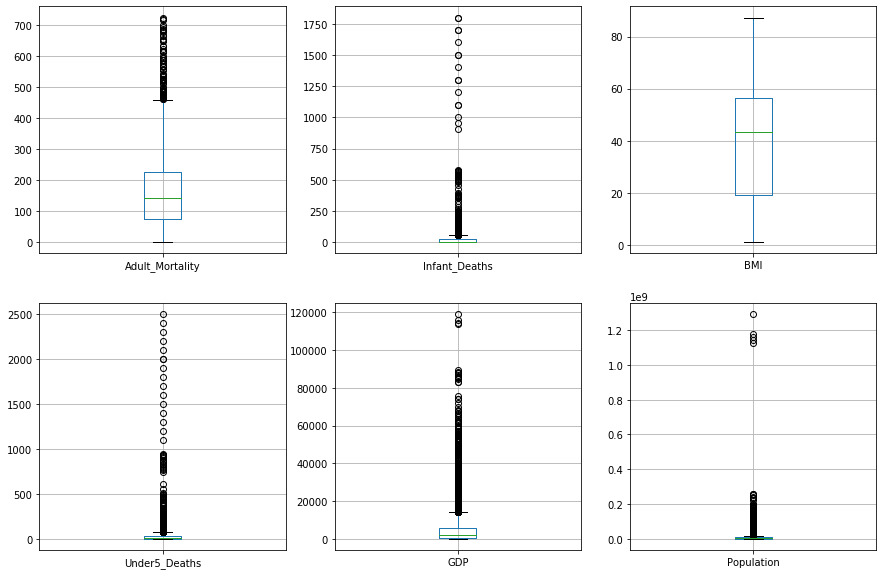

In [6]:
# 이상치 확인후, 이상치를 결측으로 처리한 뒤 결측값대체

plt.figure(figsize=(15,10))
for i, col in enumerate(['Adult_Mortality', 'Infant_Deaths', 'BMI', 'Under5_Deaths', 'GDP', 'Population'], start=1):
    plt.subplot(2, 3, i)
    life_data.boxplot(col)

In [7]:
mort_5_percentile = np.percentile(life_data.Adult_Mortality.dropna(), 5)
life_data.Adult_Mortality = life_data.apply(lambda x: np.nan if x.Adult_Mortality < mort_5_percentile else x.Adult_Mortality, axis=1)
life_data.Infant_Deaths = life_data.Infant_Deaths.replace(0, np.nan)
life_data.BMI = life_data.apply(lambda x: np.nan if (x.BMI < 10 or x.BMI > 50) else x.BMI, axis=1)
life_data['Under5_Deaths'] = life_data['Under5_Deaths'].replace(0, np.nan)

life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          2938 non-null   category
 1   Year                             2938 non-null   int64   
 2   Status                           2938 non-null   category
 3   Life_Expectancy                  2928 non-null   float64 
 4   Adult_Mortality                  2783 non-null   float64 
 5   Infant_Deaths                    2090 non-null   float64 
 6   Alcohol                          2744 non-null   float64 
 7   Percentage_Expenditure           2938 non-null   float64 
 8   Hepatitis_B                      2385 non-null   float64 
 9   Measles                          2938 non-null   int64   
 10  BMI                              1482 non-null   float64 
 11  Under5_Deaths                    2153 non-null   float64 
 12  Polio 

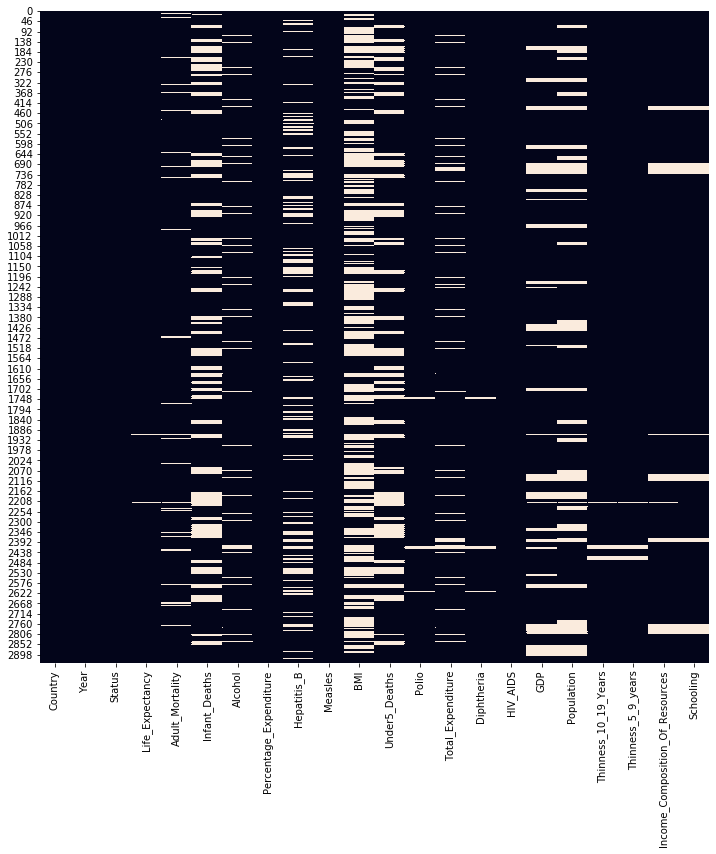

In [8]:
# 결측 분포 파악
plt.figure(figsize=(12,12))
sns.heatmap(life_data.isnull(),cbar=False)

In [9]:
# 각 열의 결측 개수와 비율 출력 함수

def null_column_percentage(df):
    df_cols = list(df.columns)
    cols_total_count = len(list(df.columns))
    cols_count = 0
    for loc, col in enumerate(df_cols):
        null_count = df[col].isnull().sum()
        total_count = df[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1
            print('[iloc = {}] {} has {} null values: {}% null'.format(loc, col, null_count, percent_null))
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('Out of {} total columns, {} contain null values; {}% columns contain null values.'.format(cols_total_count, cols_count, cols_percent_null))
    
null_column_percentage(life_data)

[iloc = 3] Life_Expectancy has 10 null values: 0.34% null
[iloc = 4] Adult_Mortality has 155 null values: 5.28% null
[iloc = 5] Infant_Deaths has 848 null values: 28.86% null
[iloc = 6] Alcohol has 194 null values: 6.6% null
[iloc = 8] Hepatitis_B has 553 null values: 18.82% null
[iloc = 10] BMI has 1456 null values: 49.56% null
[iloc = 11] Under5_Deaths has 785 null values: 26.72% null
[iloc = 12] Polio has 19 null values: 0.65% null
[iloc = 13] Total_Expenditure has 226 null values: 7.69% null
[iloc = 14] Diphtheria has 19 null values: 0.65% null
[iloc = 16] GDP has 448 null values: 15.25% null
[iloc = 17] Population has 652 null values: 22.19% null
[iloc = 18] Thinness_10_19_Years has 34 null values: 1.16% null
[iloc = 19] Thinness_5_9_years has 34 null values: 1.16% null
[iloc = 20] Income_Composition_Of_Resources has 167 null values: 5.68% null
[iloc = 21] Schooling has 163 null values: 5.55% null
Out of 22 total columns, 16 contain null values; 72.73% columns contain null values.

In [10]:
life_data.drop(columns='BMI', inplace=True)

In [11]:
# 연도별로 각 열의 중앙값으로 결측치 대체 함수(시계열 데이터 특성)

life_impute = []    # 결측치가 대체된 데이터를 저장하는 리스트

for Year in list(life_data.Year.unique()):
    year_data = life_data[life_data.Year == Year].copy()
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().median()).copy()
    life_impute.append(year_data)
    
life_data = pd.concat(life_impute).copy()

In [12]:
null_column_percentage(life_data)

Out of 21 total columns, 0 contain null values; 0.0% columns contain null values.


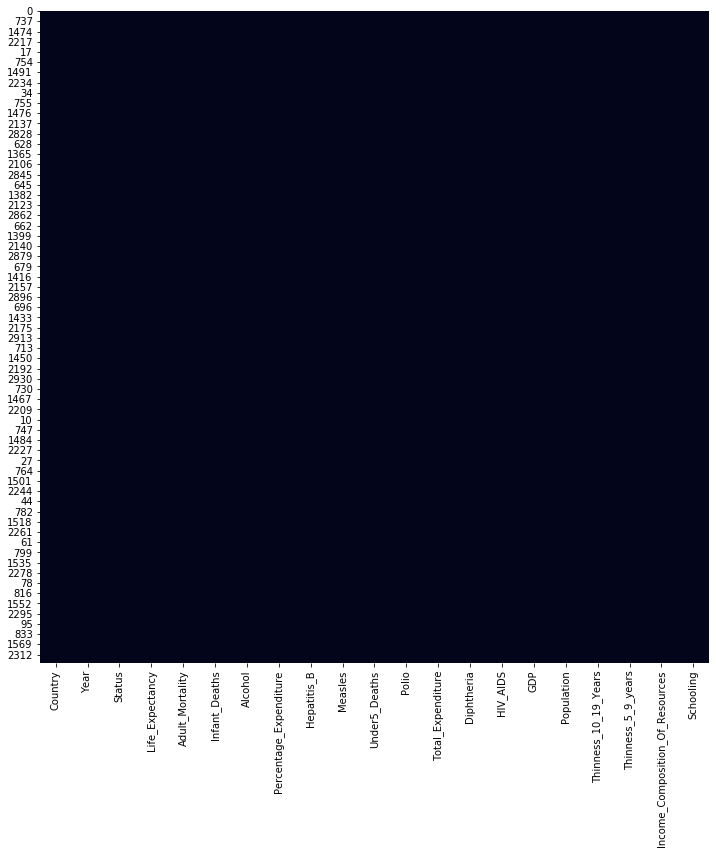

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(life_data.isnull(),cbar=False)

결측치 대체 완료

### 이상치

In [14]:
# 나라명, 연도, 국가 상태 변수는 제외 => 설명변수, 반응변수 역할을 할 수 있는 변수만 남김
var = list(life_data.columns)[3:]

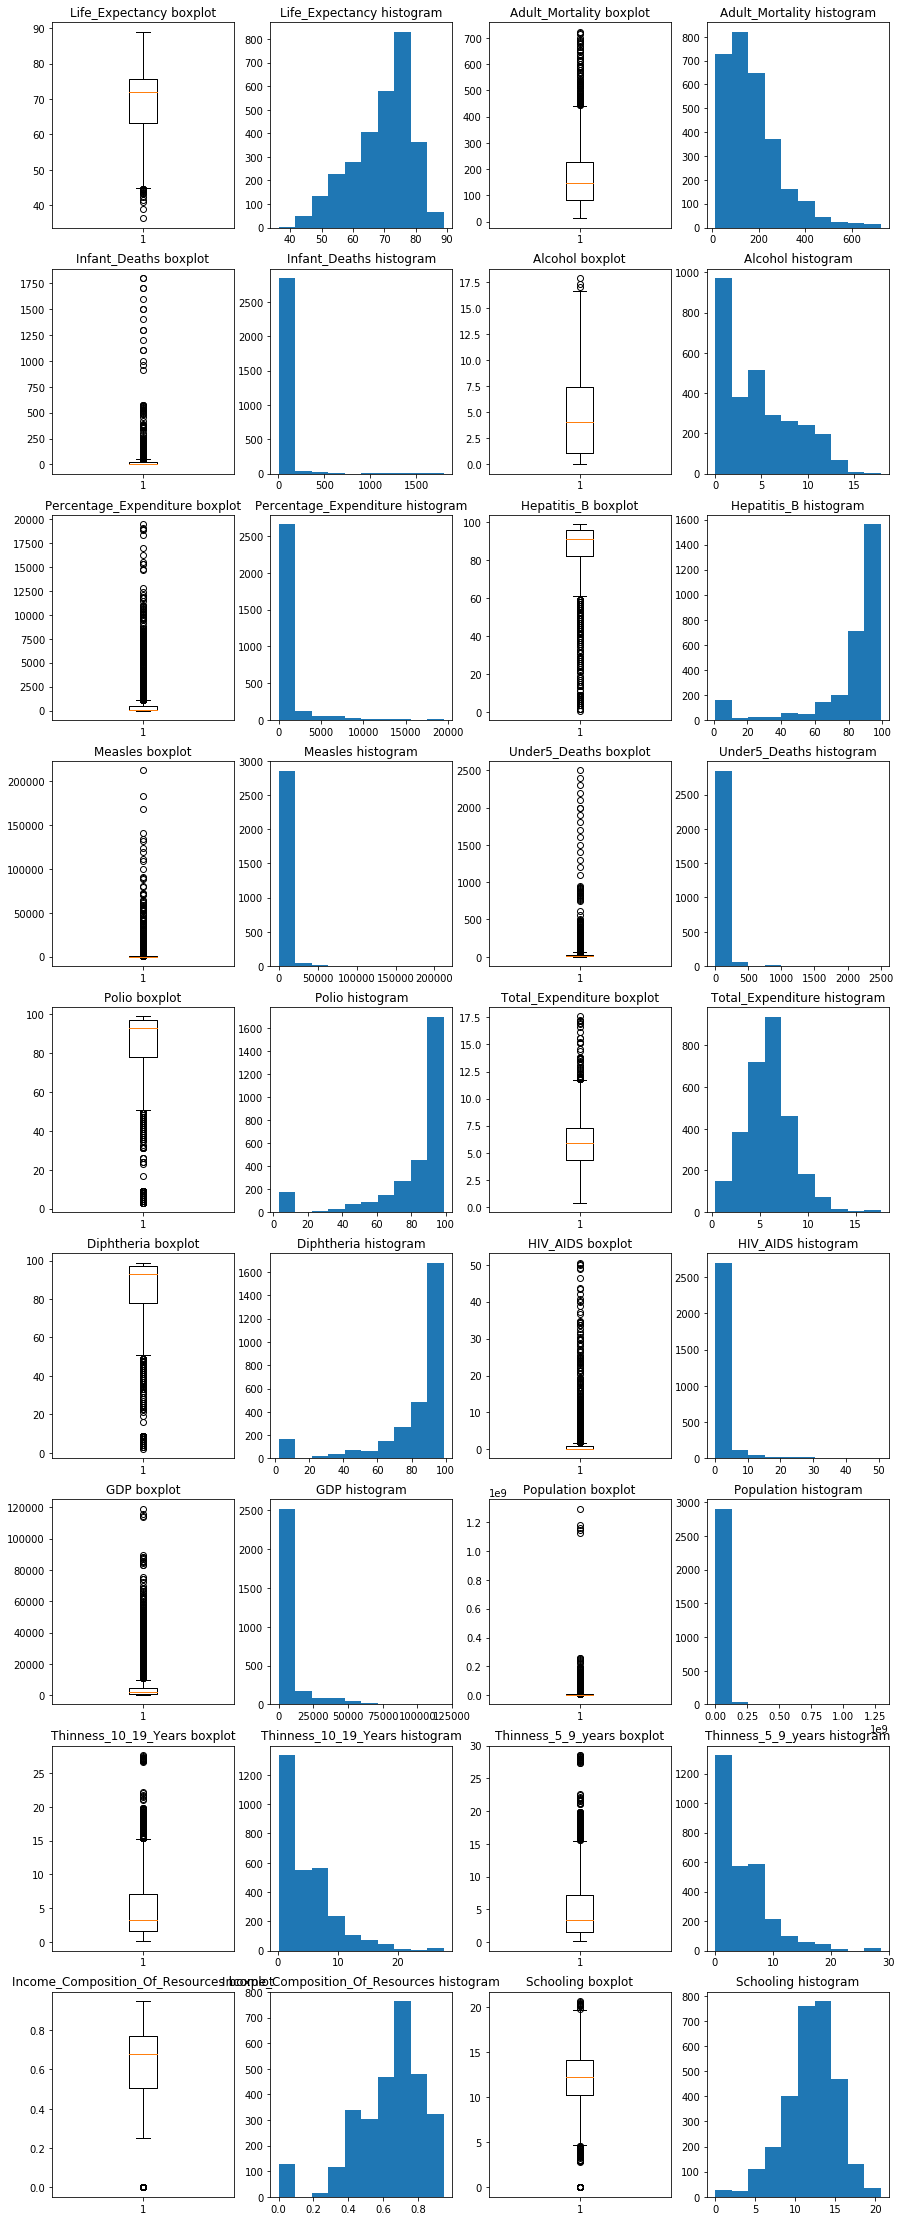

In [15]:
# 각 변수의 boxplot과 histogram 그래프로 이상치 존재 파악 함수

def outliers_graph(df):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in var:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(df[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(9, 4, i)
        plt.hist(df[col])
        plt.title('{} histogram'.format(col))
    plt.show()
outliers_graph(life_data)

In [16]:
# 2*iqr을 기준으로 각 열의 이상치 개수와 비율 출력 함수

def outlier_number_percent(col, df):
    print(12*'-' + col + 12*'-')
    pct75, pct25 = np.percentile(df[col], [75, 25])
    iqr = pct75 - pct25
    min_value = pct25 - (iqr*2)
    max_value = pct75 + (iqr*2)
    count = len(np.where((df[col] > max_value) | (df[col] < min_value))[0])
    percent = round(count/len(df[col])*100, 2)
    print('Number of outliers: {}'.format(count))
    print('Percent outlier: {}%'.format(percent))

In [17]:
for col in var:
    outlier_number_percent(col,life_data)

------------Life_Expectancy------------
Number of outliers: 1
Percent outlier: 0.03%
------------Adult_Mortality------------
Number of outliers: 50
Percent outlier: 1.7%
------------Infant_Deaths------------
Number of outliers: 290
Percent outlier: 9.87%
------------Alcohol------------
Number of outliers: 0
Percent outlier: 0.0%
------------Percentage_Expenditure------------
Number of outliers: 349
Percent outlier: 11.88%
------------Hepatitis_B------------
Number of outliers: 289
Percent outlier: 9.84%
------------Measles------------
Number of outliers: 513
Percent outlier: 17.46%
------------Under5_Deaths------------
Number of outliers: 371
Percent outlier: 12.63%
------------Polio------------
Number of outliers: 202
Percent outlier: 6.88%
------------Total_Expenditure------------
Number of outliers: 26
Percent outlier: 0.88%
------------Diphtheria------------
Number of outliers: 230
Percent outlier: 7.83%
------------HIV_AIDS------------
Number of outliers: 474
Percent outlier: 16.1

In [18]:
# winsorize 방법으로 이상치 처리

life_wins_dict = {}     # 이상치가 처리된 데이터를 저장하는 딕셔너리

def winsorize_graph(df, col, lower_limit=0, upper_limit=0, show_plot=True):
    life_wins = winsorize(df[col], limits=(lower_limit, upper_limit))
    life_wins_dict[col] = life_wins
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(life_wins)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()

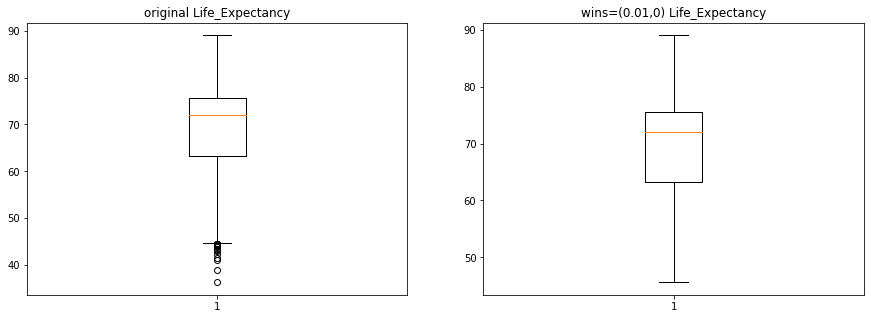

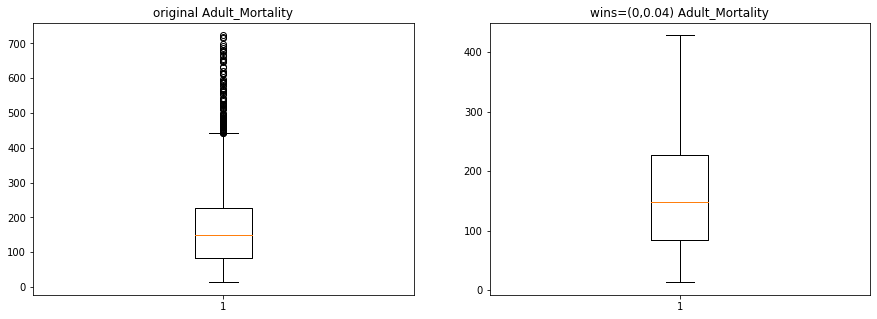

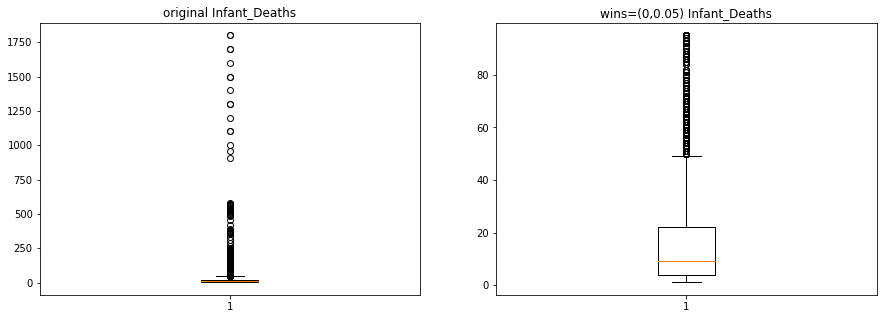

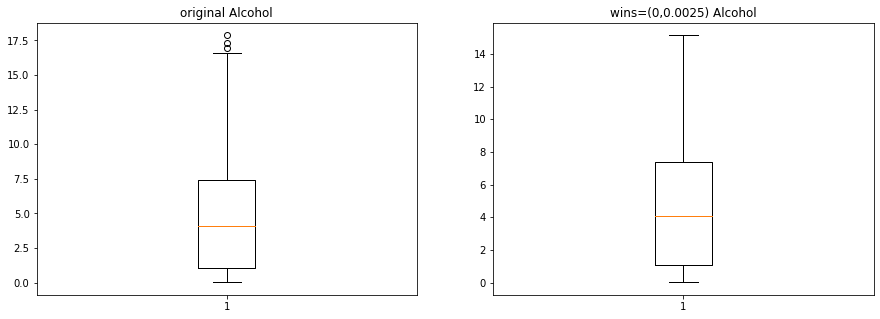

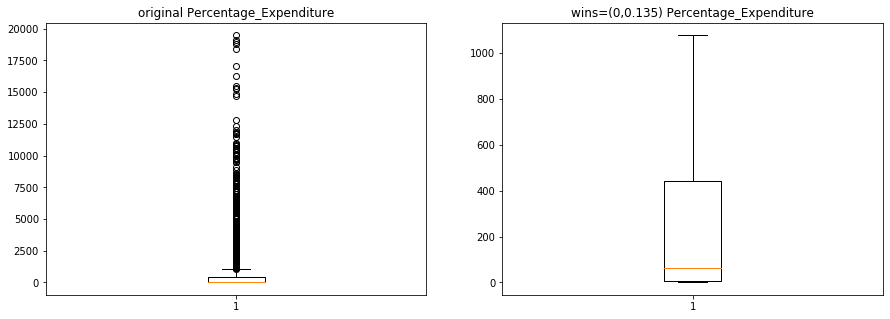

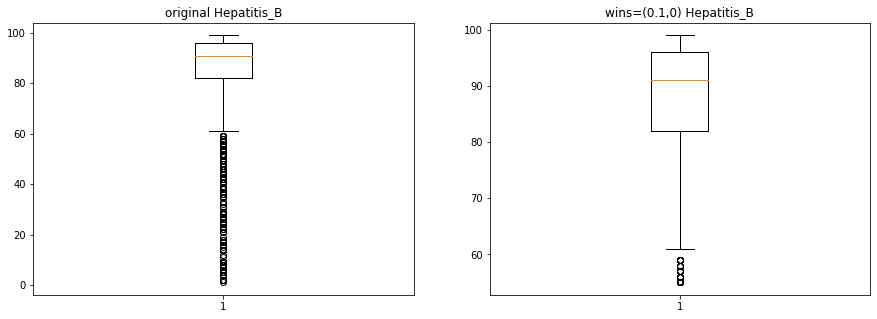

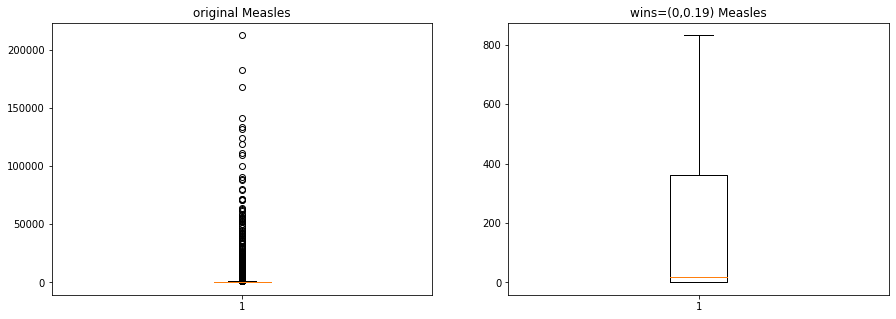

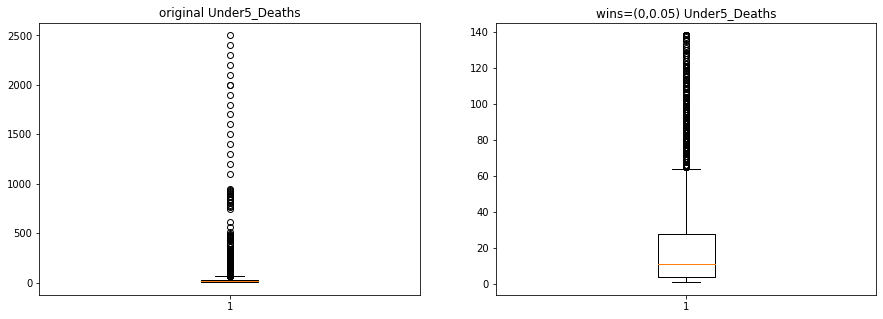

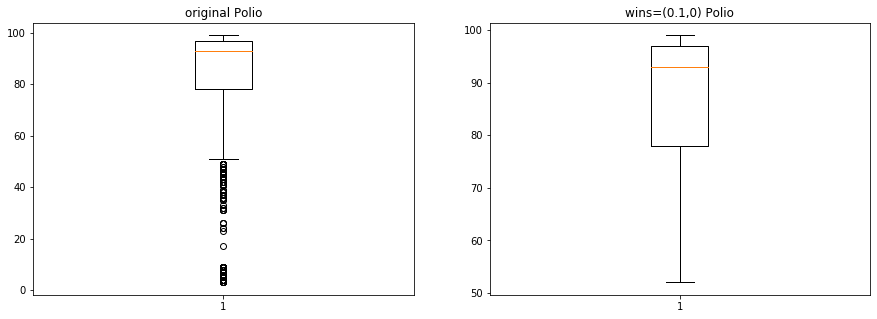

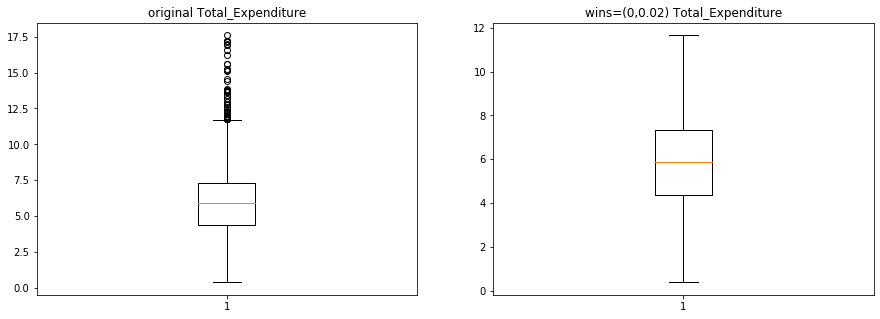

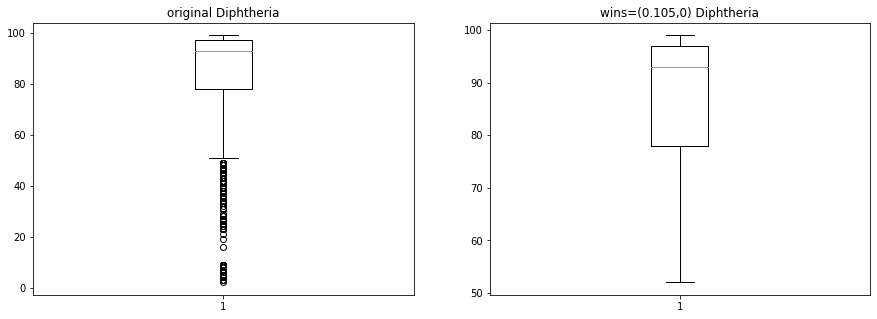

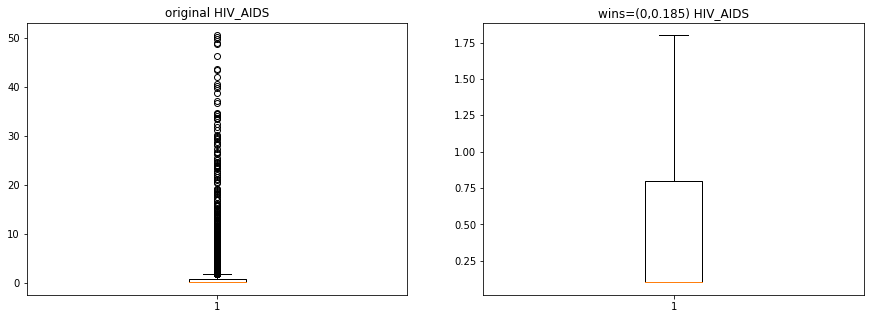

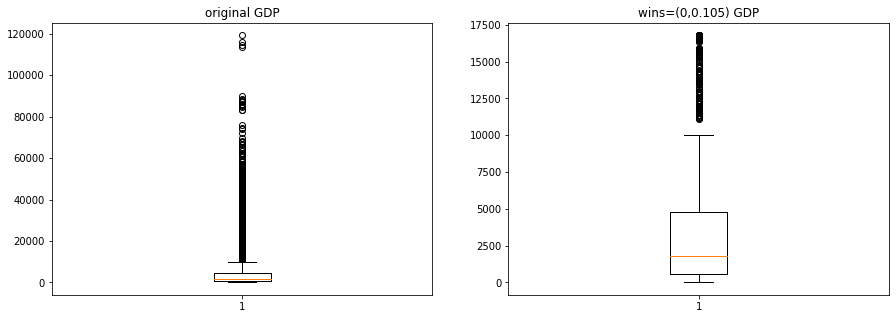

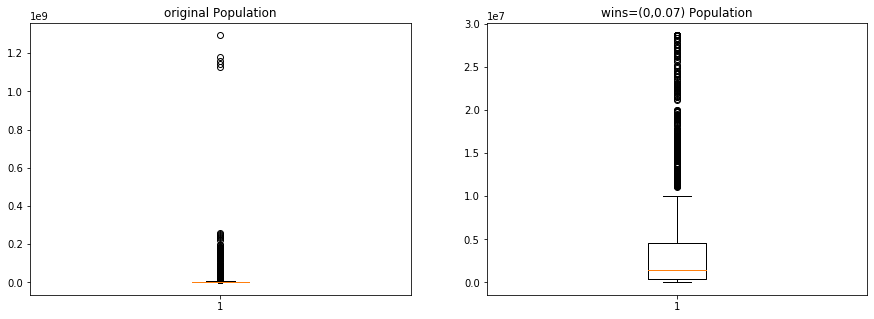

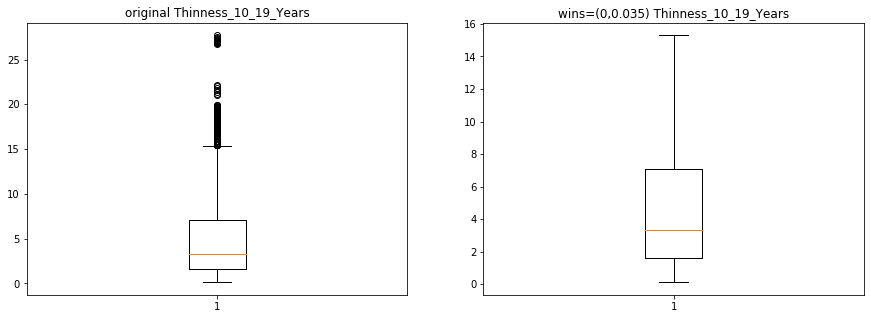

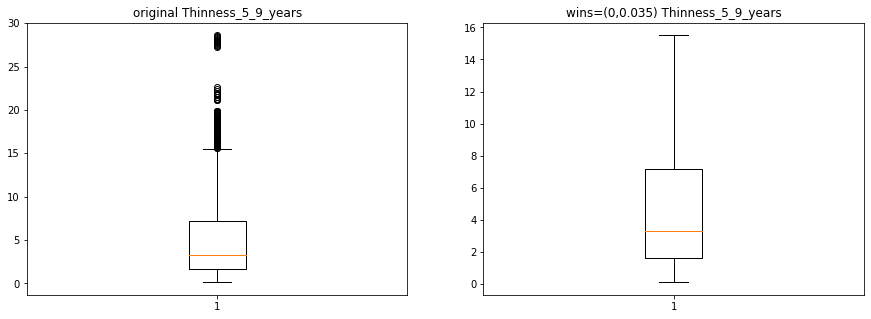

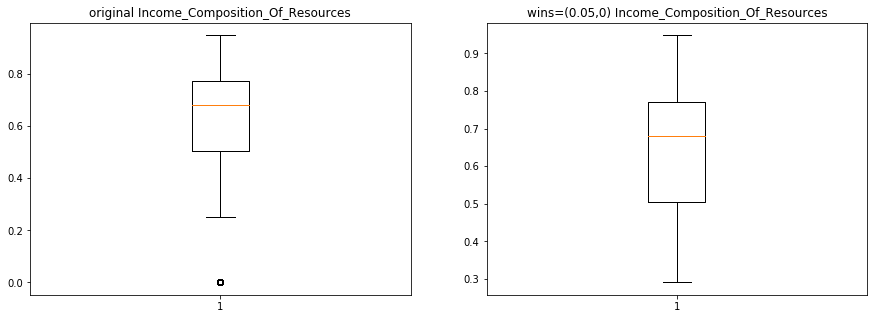

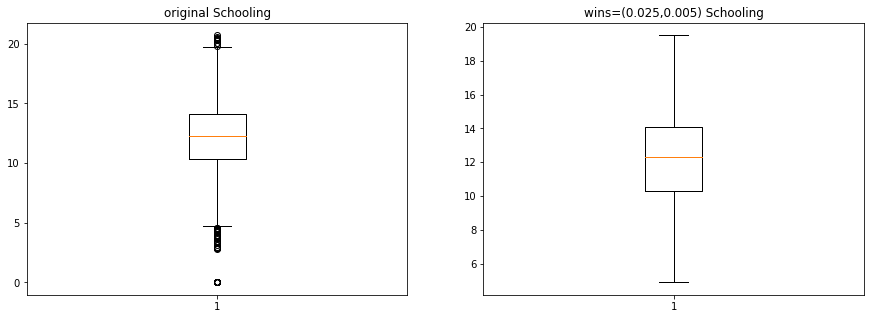

In [19]:
winsorize_graph(life_data, var[0], lower_limit=.01, show_plot=True)
winsorize_graph(life_data, var[1], upper_limit=.04, show_plot=True)
winsorize_graph(life_data, var[2], upper_limit=.05, show_plot=True)
winsorize_graph(life_data, var[3], upper_limit=.0025, show_plot=True)
winsorize_graph(life_data, var[4], upper_limit=.135, show_plot=True)
winsorize_graph(life_data, var[5], lower_limit=.1, show_plot=True)
winsorize_graph(life_data, var[6], upper_limit=.19, show_plot=True)
winsorize_graph(life_data, var[7], upper_limit=.05, show_plot=True)
winsorize_graph(life_data, var[8], lower_limit=.1, show_plot=True)
winsorize_graph(life_data, var[9], upper_limit=.02, show_plot=True)
winsorize_graph(life_data, var[10], lower_limit=.105, show_plot=True)
winsorize_graph(life_data, var[11], upper_limit=.185, show_plot=True)
winsorize_graph(life_data, var[12], upper_limit=.105, show_plot=True)
winsorize_graph(life_data, var[13], upper_limit=.07, show_plot=True)
winsorize_graph(life_data, var[14], upper_limit=.035, show_plot=True)
winsorize_graph(life_data, var[15], upper_limit=.035, show_plot=True)
winsorize_graph(life_data, var[16], lower_limit=.05, show_plot=True)
winsorize_graph(life_data, var[17], lower_limit=.025, upper_limit=.005, show_plot=True)

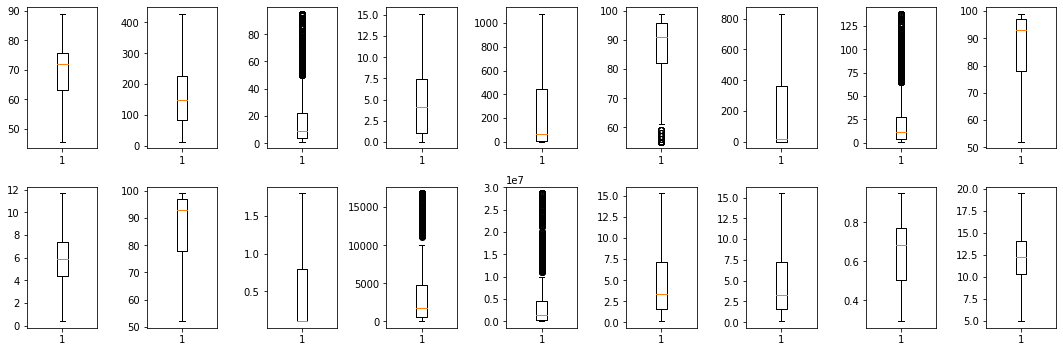

In [20]:
# 이상치 처리된 변수들 boxplot 그래프
plt.figure(figsize=(15,5))

for i, col in enumerate(var, 1):
    plt.subplot(2, 9, i)
    plt.boxplot(life_wins_dict[col])
plt.tight_layout()
plt.show()

In [21]:
life_wins_data = life_data.iloc[:,0:3]

for col in var:
    life_wins_data[col] = life_wins_dict[col]

**결측치, 이상치 처리까지 끝난 데이터 이름 => life_wins_data**

### 변수 분포

In [22]:
life_wins_data.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,Under5_Deaths,Polio,Total_Expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness_10_19_Years,Thinness_5_9_years,Income_Composition_Of_Resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.255480,168.035398,19.107897,4.634255,281.501093,85.993193,220.691287,26.419503,85.583220,5.969438,85.538972,0.526991,4209.432129,4.994901e+06,4.686249,4.703131,0.643499,12.069980
std,4.613841,9.464232,107.712459,24.884618,3.911492,384.161450,13.613617,329.192321,37.059444,15.270949,2.302385,15.213007,0.675962,5342.292920,8.192506e+06,3.928300,3.966861,0.171606,3.084312
min,2000.000000,45.600000,13.000000,1.000000,0.010000,0.000000,55.000000,0.000000,1.000000,52.000000,0.370000,52.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.291000,4.900000
25%,2004.000000,63.200000,84.000000,4.000000,1.082500,4.685343,82.000000,0.000000,4.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,148.000000,9.000000,4.100000,64.912906,91.000000,17.000000,11.000000,93.000000,5.895000,93.000000,0.100000,1791.067713,1.412669e+06,3.300000,3.300000,0.681000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,428.000000,95.000000,15.140000,1077.712092,99.000000,831.000000,138.000000,99.000000,11.660000,99.000000,1.800000,16784.346160,2.865628e+07,15.300000,15.500000,0.948000,19.500000


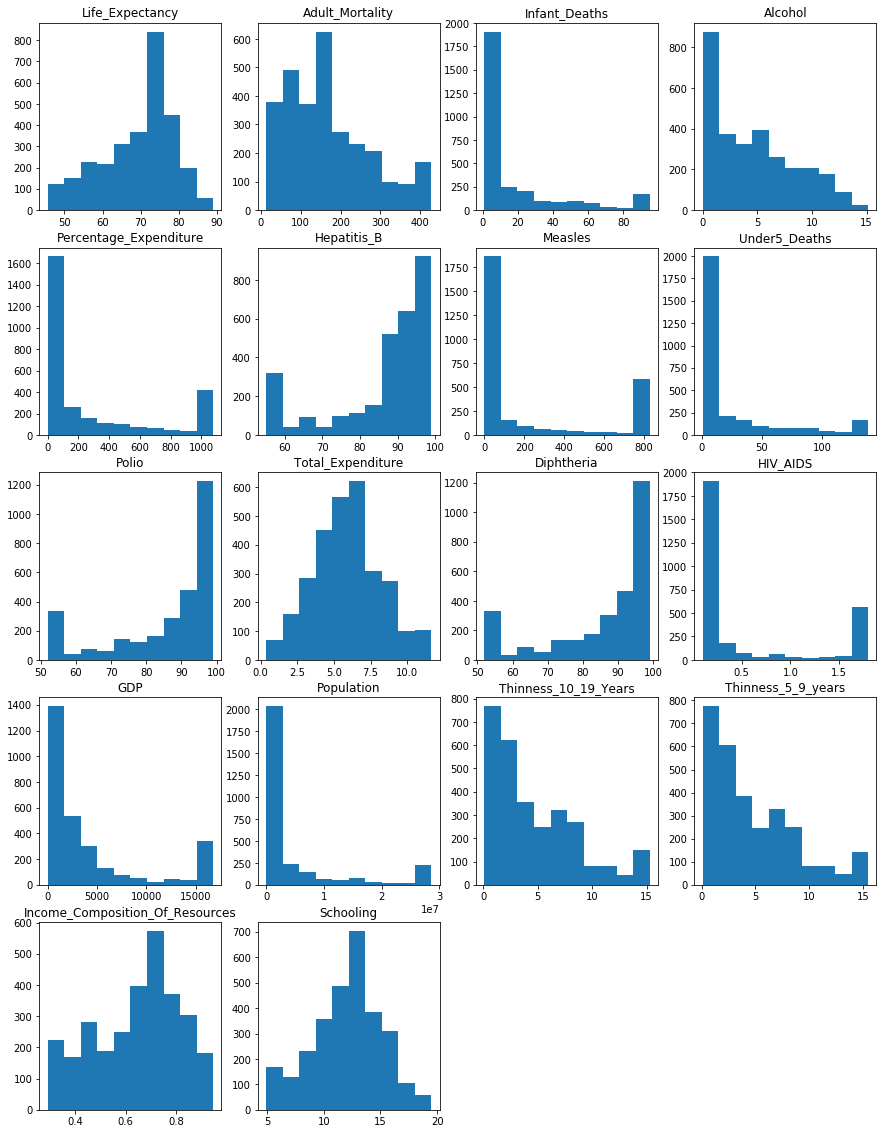

In [23]:
# 변수들 히스토그램
plt.figure(figsize=(15, 20))

for i, col in enumerate(var, 1):
    plt.subplot(5, 4, i)
    plt.hist(life_wins_data[col])
    plt.title(col)

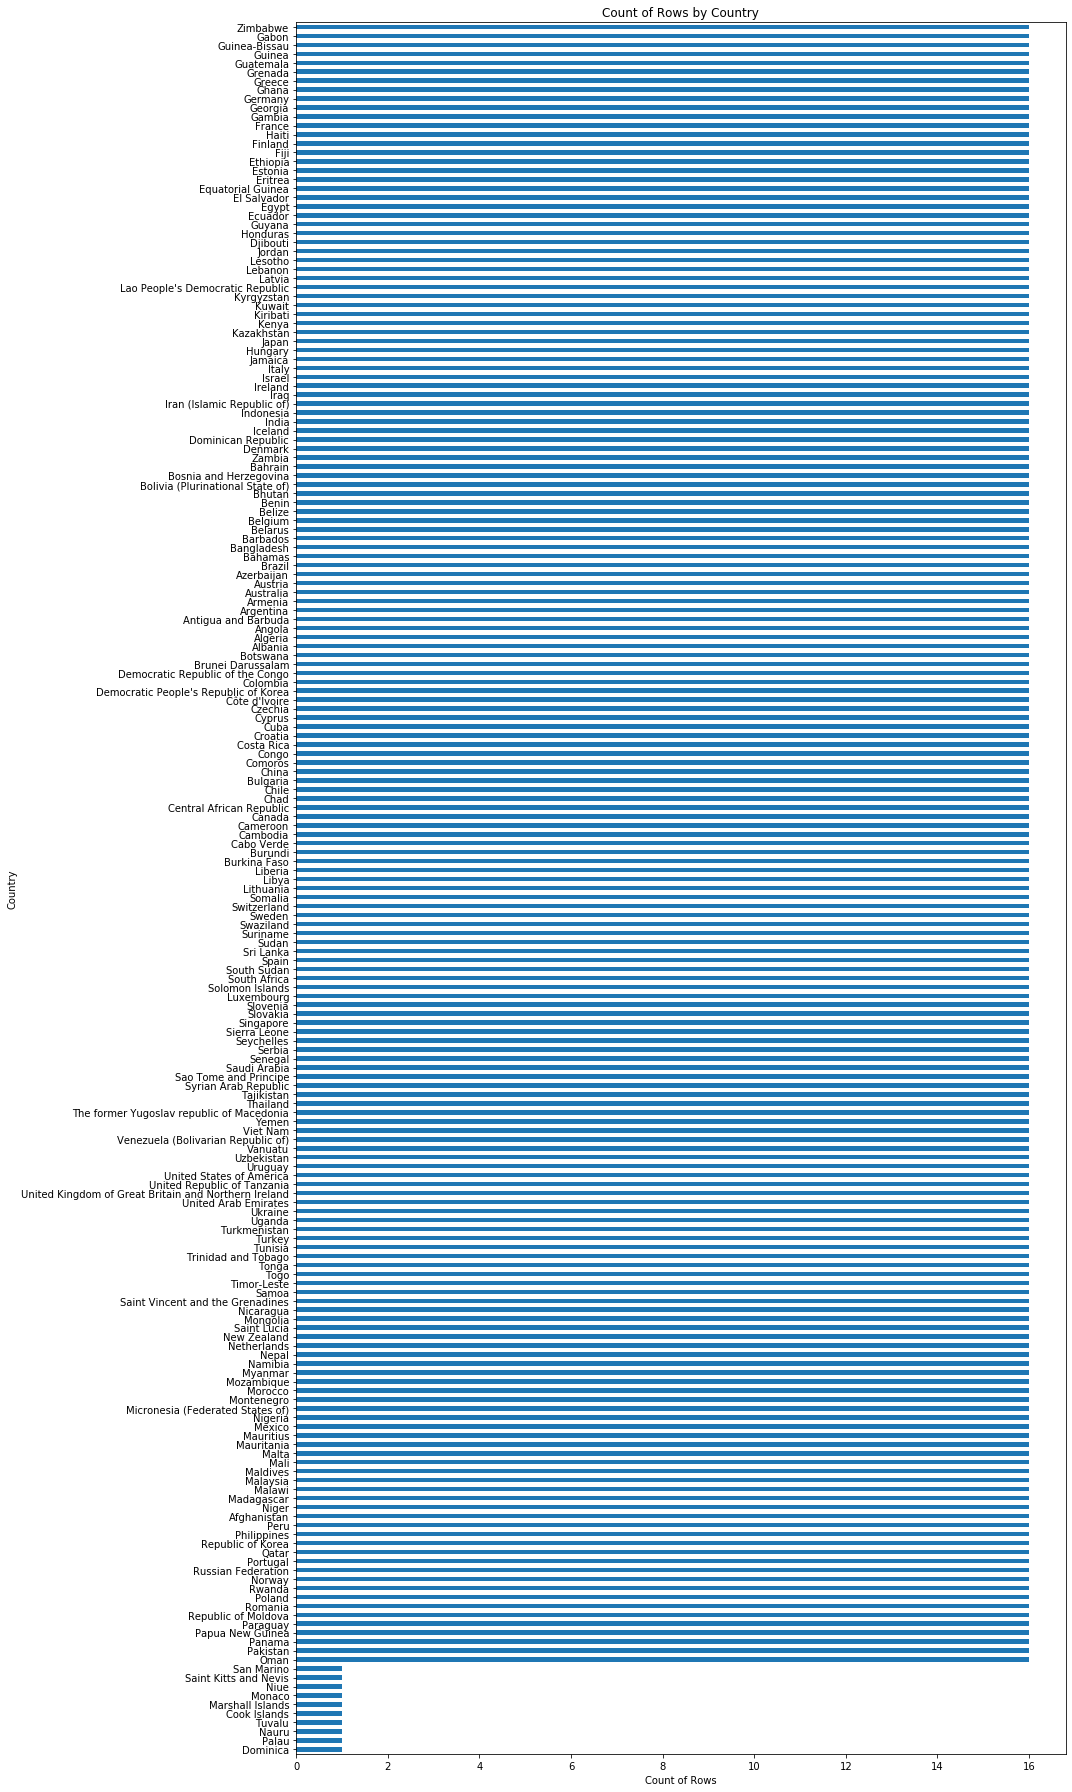

In [24]:
# 국가별 행의 개수 시각화
plt.figure(figsize=(15, 25))

life_wins_data.Country.value_counts(ascending=True).plot(kind='barh')
plt.title('Count of Rows by Country')
plt.xlabel('Count of Rows')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

대부분의 국가들이 16개의 행을 갖고 있음

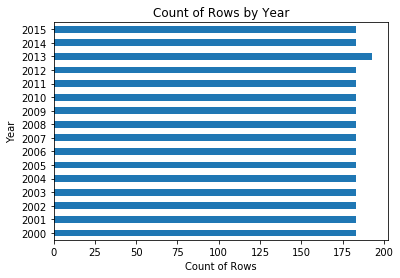

In [26]:
# 연도별 행의 개수 시각화
life_wins_data.Year.value_counts().sort_index().plot(kind='barh')

plt.title('Count of Rows by Year')
plt.xlabel('Count of Rows')
plt.ylabel('Year')
plt.show()

2013년만 행의 개수가 약 10개 더 많음

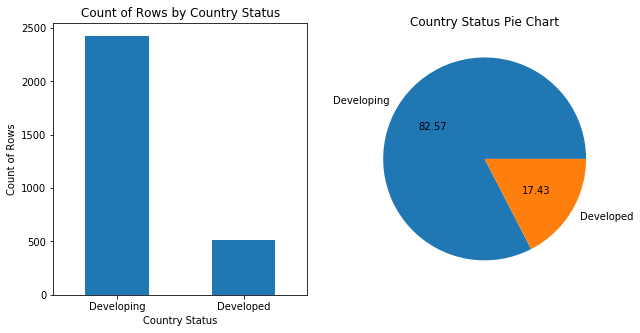

In [27]:
# 선진국과 개발도상국 데이터 비율
plt.figure(figsize=(10, 5))

plt.subplot(121)
life_wins_data.Status.value_counts().plot(kind='bar')
plt.title('Count of Rows by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Count of Rows')
plt.xticks(rotation=0)

plt.subplot(122)
life_wins_data.Status.value_counts().plot(kind='pie', autopct='%.2f')
plt.ylabel('')
plt.title('Country Status Pie Chart')

plt.show()

개발도상국의 데이터가 선진국보다 훨씬 많다

Text(0.5, 1.0, 'Boxplot of Status and Life Expectancy')

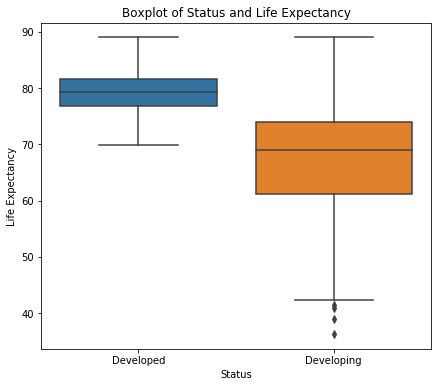

In [28]:
# 선진국 여부에 따른 기대수명 차이 시각화
plt.figure(figsize=(7,6))
plot = sns.boxplot(x='Status',y='Life_Expectancy',data=life_data)
plot.set_xlabel("Status")
plot.set_ylabel("Life Expectancy")
plot.set_title("Boxplot of Status and Life Expectancy")

개발도상국과 선진국의 기대수명에 유의미한 차이가 있어 보인다.  
두 그룹간의 평균 비교  =>  t-test

In [29]:
developed_le = life_wins_data[life_wins_data.Status == 'Developed'].Life_Expectancy
developing_le = life_wins_data[life_wins_data.Status == 'Developing'].Life_Expectancy
stats.ttest_ind(developed_le, developing_le, equal_var=False)

Ttest_indResult(statistic=47.91934126438595, pvalue=6e-323)

t-test 결과 p-value < 0.05 이므로 두 그룹간의 평균이 다르다.  

## 회귀 모델링

In [22]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
life_wins_data['Status'] = encoder.fit_transform(life_wins_data['Status'])

var2 = list(life_data.columns)[2:]

**[Status 변수 인코딩 결과]**  
개발도상국 = 1  
선진국 = 0

In [23]:
# train/test set 분리 : 7대3
from sklearn.model_selection import train_test_split
life_train , life_test = train_test_split(life_wins_data, test_size = 0.3, train_size=0.7,
                                          random_state=1234, shuffle = True, stratify = life_wins_data.Status)
life_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 1032 to 2305
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          2056 non-null   category
 1   Year                             2056 non-null   int64   
 2   Status                           2056 non-null   int32   
 3   Life_Expectancy                  2056 non-null   float64 
 4   Adult_Mortality                  2056 non-null   float64 
 5   Infant_Deaths                    2056 non-null   float64 
 6   Alcohol                          2056 non-null   float64 
 7   Percentage_Expenditure           2056 non-null   float64 
 8   Hepatitis_B                      2056 non-null   float64 
 9   Measles                          2056 non-null   int64   
 10  Under5_Deaths                    2056 non-null   float64 
 11  Polio                            2056 non-null   float64 
 12  Tot

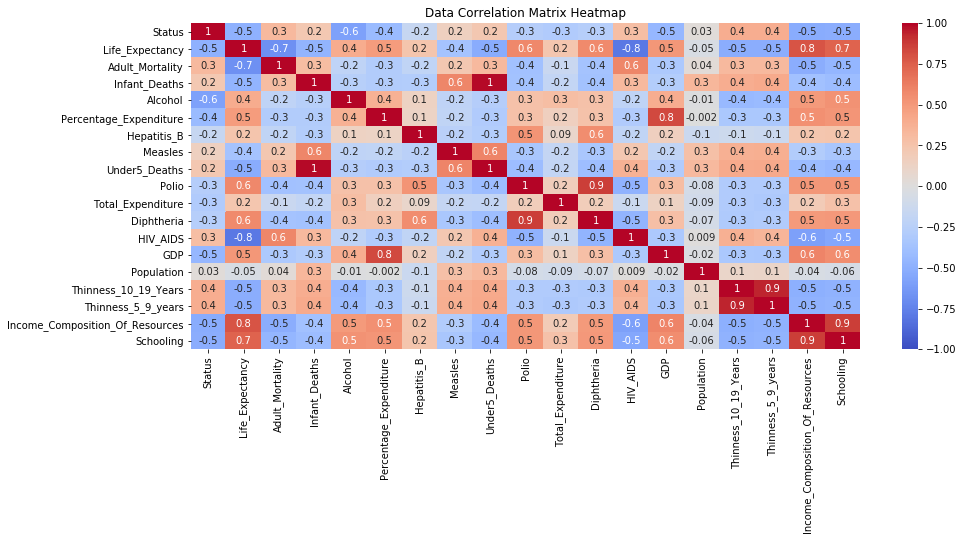

In [52]:
plt.figure(figsize=(15,6))
sns.heatmap(life_train[var2].corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.title('Data Correlation Matrix Heatmap')
plt.show()

### 단순선형회귀

In [53]:
# 상수항만 존재하는 모델
result_intercept = smf.ols('Life_Expectancy~1', data=life_train).fit()
result_intercept.summary()

C:\Users\bbori\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\bbori\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\bbori\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                nan
Time:                        16:18:28   Log-Likelihood:                -7559.2
No. Observations:                2056   AIC:                         1.512e+04
Df Residuals:                    2055   BIC:                         1.513e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.1645      0.211    327.929      0.000      68.751      69.578
==============================================================================
Omnibus:                      120.462   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.875
Skew:                          -0.599   Prob(JB):                     1.40e-29
Kurtosis:                       2.662   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# 단순선형회귀 적합
result_slr = smf.ols('Life_Expectancy ~ HIV_AIDS', data=life_train).fit()
result_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     3470.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:18:28   Log-Likelihood:                -6542.2
No. Observations:                2056   AIC:                         1.309e+04
Df Residuals:                    2054   BIC:                         1.310e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.1235      0.164    459.036      0.000      74.803      75.444
HIV_AIDS     -11.2000      0.190    -58.905      0.000     -11.573     -10.827
==============================================================================
Omnibus:                        5.627   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                6.696
Skew:                          -0.007   Prob(JB):                       0.0352
Kurtosis:                       3.279   Cond. No.                         2.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

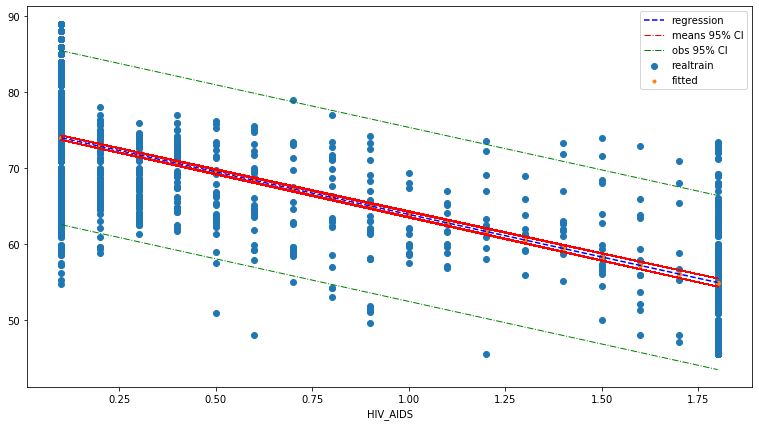

In [55]:
# 단순선형회귀 시각화
plt.figure(figsize=(13,7))

plt.scatter(life_train['HIV_AIDS'], life_train['Life_Expectancy'], marker='o', label='realtrain')
plt.scatter(life_train['HIV_AIDS'], result_slr.fittedvalues, marker='.', label='fitted')
plt.plot(life_train['HIV_AIDS'], result_slr.predict(life_train['HIV_AIDS']), color='blue', linestyle='dashed', label='regression', markersize=0)

pred_slr = result_slr.get_prediction().summary_frame()

plt.plot(life_train['HIV_AIDS'], pred_slr['mean_ci_lower'], 'r-.', label='means 95% CI', linewidth=1)
plt.plot(life_train['HIV_AIDS'], pred_slr['mean_ci_upper'], 'r-.', linewidth=1)
plt.plot(life_train['HIV_AIDS'], pred_slr['obs_ci_lower'], 'g-.', label='obs 95% CI', linewidth=1)
plt.plot(life_train['HIV_AIDS'], pred_slr['obs_ci_upper'], 'g-.', linewidth=1)
plt.xlabel('HIV_AIDS')
plt.legend()

#### 모델 가정 확인

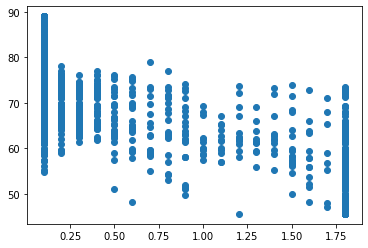

In [56]:
# 선형성 (상관계수 = -0.8)
plt.scatter('HIV_AIDS','Life_Expectancy',data=life_train)

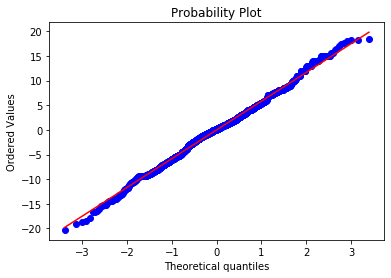

In [57]:
# 정규성
resid_slr = result_slr.resid

stats.probplot(resid_slr,plot=plt)
plt.show()

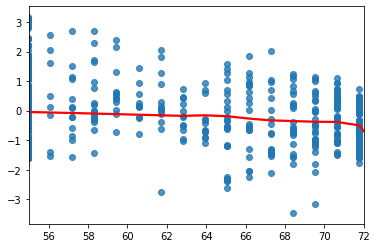

In [60]:
# 등분산성
fitted_slr = result_slr.predict(life_train)
sns.regplot(fitted_slr, stats.zscore(resid_slr),lowess = True, line_kws={'color' : 'red'})
plt.xlim(55.0, 72)
plt.show()

### 다중선형회귀

**[단계적 변수 선택]**  
절편만 포함된 모델에서 출발해 변수의 추가, 삭제를 반복한다.  
모델에서 빠져 있는 변수 중에서 기준 통계치를 가장 개선시키는 변수를 추가한다.  

#### mlr1 : Status 추가

In [31]:
result_mlr1 = smf.ols('Life_Expectancy ~ HIV_AIDS + Status', data=life_train).fit()
result_mlr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2408.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:16:48   Log-Likelihood:                -6317.5
No. Observations:                2056   AIC:                         1.264e+04
Df Residuals:                    2053   BIC:                         1.266e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.3850      0.277    290.179      0.000      79.842      80.928
HIV_AIDS     -10.0291      0.178    -56.238      0.000     -10.379      -9.679
Status        -7.1252      0.318    -22.394      0.000      -7.749      -6.501
==============================================================================
Omnibus:                       20.023   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.668
Skew:                           0.013   Prob(JB):                     1.33e-07
Kurtosis:                       3.607   Cond. No.                         5.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### mlr1_Scatter Plot

Text(0.5, 1.0, 'Scatter Plot of mlr1')

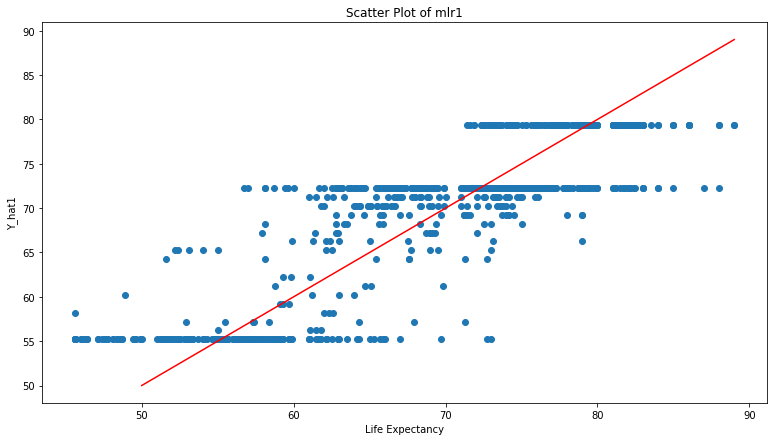

In [45]:
y = life_test['Life_Expectancy']
y_hat1 = result_mlr1.predict(life_test[['HIV_AIDS' , 'Status']])

# 시각화
plt.figure(figsize=(13,7))

plt.scatter(y, y_hat1, marker='o')
x = np.arange(50, 90)
plt.plot(x,x, 'red')
plt.xlabel('Life Expectancy')
plt.ylabel('Y_hat1')
plt.title('Scatter Plot of mlr1')

#### mlr2 : Income 변수 추가

In [46]:
result_mlr2 = smf.ols('Life_Expectancy ~ HIV_AIDS + Status + Income_Composition_Of_Resources', data=life_train).fit()
result_mlr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     2726.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:28:19   Log-Likelihood:                -5907.7
No. Observations:                2056   AIC:                         1.182e+04
Df Residuals:                    2052   BIC:                         1.185e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          59.7826      0.688     86.851      0.000      58.433      61.133
HIV_AIDS                           -7.0689      0.173    -40.761      0.000      -7.409      -6.729
Status                             -2.9750      0.292    -10.197      0.000      -3.547      -2.403
Income_Composition_Of_Resources    24.3061      0.767     31.704      0.000      22.803      25.810
==============================================================================
Omnibus:                       58.850   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.699
Skew:                           0.151   Prob(JB):                     8.36e-28
Kurtosis:                       4.168   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### mlr2_Scatter Plot

Text(0.5, 1.0, 'Scatter Plot of mlr2')

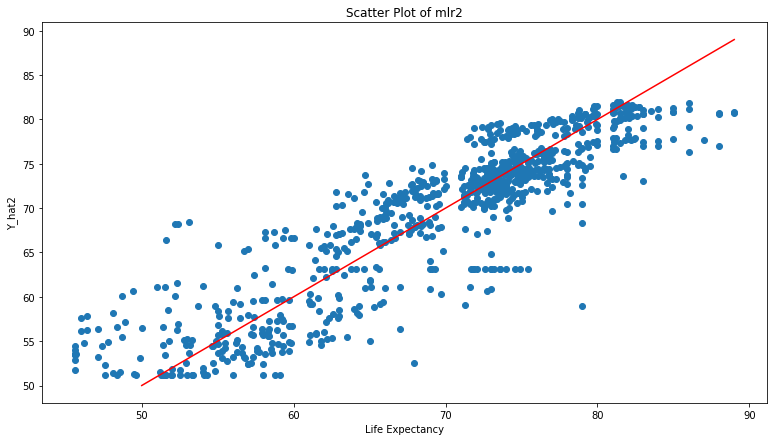

In [47]:
y = life_test['Life_Expectancy']
y_hat2 = result_mlr2.predict(life_test[['HIV_AIDS' , 'Status','Income_Composition_Of_Resources']])

# 시각화
plt.figure(figsize=(13,7))

plt.scatter(y, y_hat2, marker='o')
x = np.arange(50, 90)
plt.plot(x,x, 'red')
plt.xlabel('Life Expectancy')
plt.ylabel('Y_hat2')
plt.title('Scatter Plot of mlr2')

#### mlr3 : Adult_Mortality 변수 추가

In [48]:
result_mlr3 = smf.ols('Life_Expectancy ~ HIV_AIDS + Status + Income_Composition_Of_Resources + Adult_Mortality', data=life_train).fit()
result_mlr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     2403.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:28:59   Log-Likelihood:                -5772.5
No. Observations:                2056   AIC:                         1.155e+04
Df Residuals:                    2051   BIC:                         1.158e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          63.2049      0.675     93.574      0.000      61.880      64.530
HIV_AIDS                           -5.8089      0.179    -32.530      0.000      -6.159      -5.459
Status                             -2.5397      0.274     -9.254      0.000      -3.078      -2.001
Income_Composition_Of_Resources    22.0125      0.731     30.128      0.000      20.580      23.445
Adult_Mortality                    -0.0178      0.001    -16.980      0.000      -0.020      -0.016
==============================================================================
Omnibus:                       70.368   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.047
Skew:                           0.114   Prob(JB):                     2.18e-39
Kurtosis:                       4.423   Cond. No.                     2.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### mlr3_Scatter Plot

Text(0.5, 1.0, 'Scatter Plot of mlr3')

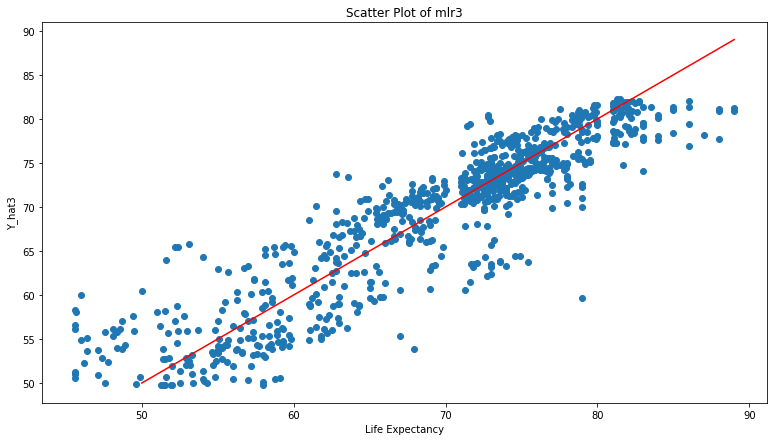

In [49]:
y = life_test['Life_Expectancy']
y_hat3 = result_mlr3.predict(life_test[['HIV_AIDS' , 'Status','Income_Composition_Of_Resources','Adult_Mortality']])

# 시각화
plt.figure(figsize=(13,7))

plt.scatter(y, y_hat3, marker='o')
x = np.arange(50, 90)
plt.plot(x,x, 'red')
plt.xlabel('Life Expectancy')
plt.ylabel('Y_hat3')
plt.title('Scatter Plot of mlr3')

**interaction effect 추가 (Status:Adult_Mortality)**

In [50]:
result_mlr31 = smf.ols('Life_Expectancy ~ HIV_AIDS + Status + Income_Composition_Of_Resources + Adult_Mortality + Status:Adult_Mortality', data=life_train).fit()
result_mlr31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     1929.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:29:50   Log-Likelihood:                -5769.1
No. Observations:                2056   AIC:                         1.155e+04
Df Residuals:                    2050   BIC:                         1.158e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          64.3482      0.805     79.980      0.000      62.770      65.926
HIV_AIDS                           -5.8652      0.180    -32.653      0.000      -6.217      -5.513
Status                             -3.7292      0.532     -7.006      0.000      -4.773      -2.685
Income_Composition_Of_Resources    21.9682      0.730     30.102      0.000      20.537      23.399
Adult_Mortality                    -0.0298      0.005     -6.311      0.000      -0.039      -0.021
Status:Adult_Mortality              0.0126      0.005      2.607      0.009       0.003       0.022
==============================================================================
Omnibus:                       71.259   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.959
Skew:                           0.118   Prob(JB):                     5.07e-40
Kurtosis:                       4.434   Cond. No.                     3.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

=> interaction effect를 넣고 fitting한 모형의 t-test 결과, interaction term이 유의하다.

**더 좋은 모델을 선택하기 위한 F test**

In [52]:
anova_lm(result_mlr3, result_mlr31, typ=1)

C:\Users\bbori\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\bbori\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\bbori\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2051.0,33053.736648,0.0,NaN,NaN,NaN
1,2050.0,32944.528511,1.0,109.208137,6.795565,0.009205


=> 유의확률이 0.05보다 작기 때문에 interaction term이 추가된 모형이 더욱 효과적이다.

**공선성 경고를 확인하기 위해 VIF 지수 확인**

In [53]:
y, X = dmatrices('Life_Expectancy ~ HIV_AIDS + Status + Income_Composition_Of_Resources + Adult_Mortality', life_train, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,58.204677,Intercept
1,1.862212,HIV_AIDS
2,1.381872,Status
3,1.996374,Income_Composition_Of_Resources
4,1.643605,Adult_Mortality


=>  다중공선성 문제 없음

#### mlr31_Scatter Plot

Text(0.5, 1.0, 'Scatter Plot of mlr31')

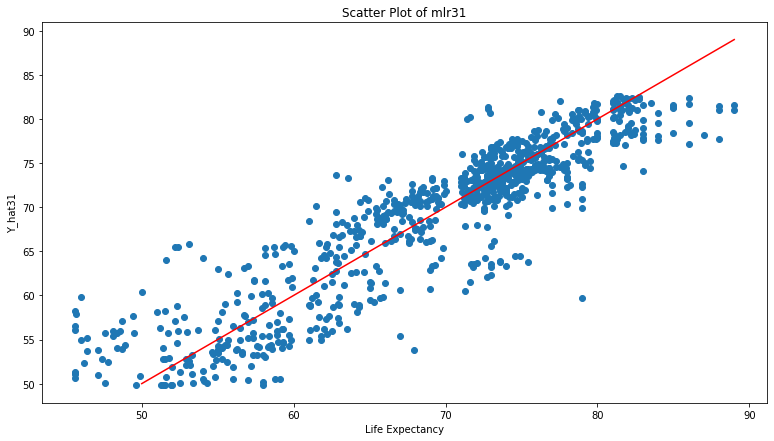

In [55]:
y = life_test['Life_Expectancy']
y_hat31 = result_mlr31.predict(life_test[['HIV_AIDS' , 'Status','Income_Composition_Of_Resources','Adult_Mortality']])

# 시각화
plt.figure(figsize=(13,7))

plt.scatter(y, y_hat31, marker='o')
x = np.arange(50, 90)
plt.plot(x,x, 'red')
plt.xlabel('Life Expectancy')
plt.ylabel('Y_hat31')
plt.title('Scatter Plot of mlr31')

#### mlr4 : Diphtheria 변수 추가

In [56]:
result_mlr4 = smf.ols(
    'Life_Expectancy ~ HIV_AIDS + Status + Income_Composition_Of_Resources + Adult_Mortality + Diphtheria + Status:Adult_Mortality',
    data=life_train).fit()
result_mlr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1731.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:32:16   Log-Likelihood:                -5705.7
No. Observations:                2056   AIC:                         1.143e+04
Df Residuals:                    2049   BIC:                         1.146e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          59.0914      0.906     65.208      0.000      57.314      60.869
HIV_AIDS                           -5.4509      0.178    -30.631      0.000      -5.800      -5.102
Status                             -3.9050      0.516     -7.561      0.000      -4.918      -2.892
Income_Composition_Of_Resources    19.7685      0.734     26.947      0.000      18.330      21.207
Adult_Mortality                    -0.0312      0.005     -6.818      0.000      -0.040      -0.022
Diphtheria                          0.0763      0.007     11.410      0.000       0.063       0.089
Status:Adult_Mortality              0.0147      0.005      3.141      0.002       0.006       0.024
==============================================================================
Omnibus:                       59.548   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.857
Skew:                           0.113   Prob(JB):                     3.16e-30
Kurtosis:                       4.239   Cond. No.                     3.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**공선성 경고를 확인하기 위해 VIF 지수 확인**

In [57]:
y, X = dmatrices('Life_Expectancy ~ HIV_AIDS + Status + Income_Composition_Of_Resources + Adult_Mortality + Diphtheria', life_train, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,89.189440,Intercept
1,1.947949,HIV_AIDS
2,1.381971,Status
3,2.143311,Income_Composition_Of_Resources
4,1.647999,Adult_Mortality
5,1.424946,Diphtheria


=> 심각한 공선성 문제를 유발하는 변수 없음

#### mlr4_Scatter Plot

Text(0.5, 1.0, 'Scatter Plot of mlr4')

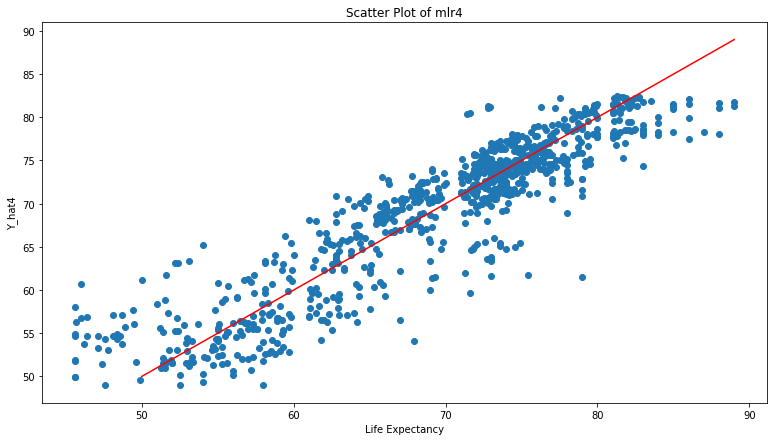

In [58]:
y = life_test['Life_Expectancy']
y_hat4 = result_mlr4.predict(life_test[['HIV_AIDS' , 'Status','Income_Composition_Of_Resources','Adult_Mortality','Diphtheria']])

# 시각화
plt.figure(figsize=(13,7))

plt.scatter(y, y_hat4, marker='o')
x = np.arange(50, 90)
plt.plot(x,x, 'red')
plt.xlabel('Life Expectancy')
plt.ylabel('Y_hat4')
plt.title('Scatter Plot of mlr4')

#### mlr5 : Infant_Deaths 변수 추가

In [59]:
result_mlr5 = smf.ols('Life_Expectancy ~ HIV_AIDS + Status + Income_Composition_Of_Resources + Adult_Mortality + Diphtheria + Infant_Deaths', data=life_train).fit()
result_mlr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     1856.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:32:57   Log-Likelihood:                -5645.2
No. Observations:                2056   AIC:                         1.130e+04
Df Residuals:                    2049   BIC:                         1.134e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          60.4427      0.818     73.870      0.000      58.838      62.047
HIV_AIDS                           -5.3064      0.172    -30.869      0.000      -5.643      -4.969
Status                             -2.4470      0.258     -9.478      0.000      -2.953      -1.941
Income_Composition_Of_Resources    18.6937      0.719     26.007      0.000      17.284      20.103
Adult_Mortality                    -0.0163      0.001    -16.458      0.000      -0.018      -0.014
Diphtheria                          0.0601      0.007      9.072      0.000       0.047       0.073
Infant_Deaths                      -0.0421      0.004    -11.613      0.000      -0.049      -0.035
==============================================================================
Omnibus:                       60.519   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.179
Skew:                           0.050   Prob(JB):                     4.04e-33
Kurtosis:                       4.316   Cond. No.                     2.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**공선성 경고를 확인하기 위해 VIF 지수 확인**

In [60]:
y, X = dmatrices('Life_Expectancy ~ HIV_AIDS + Status + Income_Composition_Of_Resources + Adult_Mortality + Diphtheria + Infant_Deaths', life_train, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,96.579464,Intercept
1,1.951356,HIV_AIDS
2,1.382666,Status
3,2.184826,Income_Composition_Of_Resources
4,1.658369,Adult_Mortality
5,1.484394,Diphtheria
6,1.250461,Infant_Deaths


=> 심각한 공선성 문제를 유발하는 변수 없음

#### mlr5_Scatter Plot

Text(0.5, 1.0, 'Scatter Plot of mlr5')

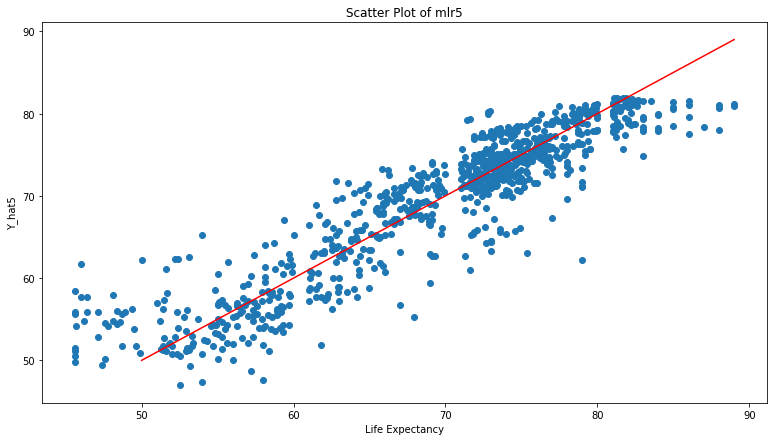

In [61]:
y = life_test['Life_Expectancy']
y_hat5 = result_mlr5.predict(life_test[['HIV_AIDS' , 'Status','Income_Composition_Of_Resources','Adult_Mortality',
                                        'Diphtheria','Infant_Deaths']])

# 시각화
plt.figure(figsize=(13,7))

plt.scatter(y, y_hat5, marker='o')
x = np.arange(50, 90)
plt.plot(x,x, 'red')
plt.xlabel('Life Expectancy')
plt.ylabel('Y_hat5')
plt.title('Scatter Plot of mlr5')

#### mlr6 : GDP 변수 추가

In [62]:
result_mlr6 = smf.ols('Life_Expectancy ~ HIV_AIDS + Status + Income_Composition_Of_Resources + Adult_Mortality + Diphtheria + Infant_Deaths + GDP + Status:Adult_Mortality', data=life_train).fit()
result_mlr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     1416.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:33:16   Log-Likelihood:                -5629.4
No. Observations:                2056   AIC:                         1.128e+04
Df Residuals:                    2047   BIC:                         1.133e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          62.1004      0.907     68.479      0.000      60.322      63.879
HIV_AIDS                           -5.4123      0.172    -31.486      0.000      -5.749      -5.075
Status                             -3.7273      0.503     -7.406      0.000      -4.714      -2.740
Income_Composition_Of_Resources    17.2601      0.781     22.111      0.000      15.729      18.791
Adult_Mortality                    -0.0313      0.004     -7.086      0.000      -0.040      -0.023
Diphtheria                          0.0616      0.007      9.353      0.000       0.049       0.074
Infant_Deaths                      -0.0415      0.004    -11.477      0.000      -0.049      -0.034
GDP                              8.492e-05   2.01e-05      4.228      0.000    4.55e-05       0.000
Status:Adult_Mortality              0.0159      0.005      3.514      0.000       0.007       0.025
==============================================================================
Omnibus:                       59.763   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.255
Skew:                           0.059   Prob(JB):                     2.87e-32
Kurtosis:                       4.297   Cond. No.                     8.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**공선성 경고를 확인하기 위해 VIF 지수 확인**

In [63]:
y, X = dmatrices('Life_Expectancy ~ HIV_AIDS + Status + Income_Composition_Of_Resources + Adult_Mortality + Diphtheria + Infant_Deaths + GDP', life_train, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,97.076469,Intercept
1,1.957585,HIV_AIDS
2,1.440403,Status
3,2.613608,Income_Composition_Of_Resources
4,1.659357,Adult_Mortality
5,1.485438,Diphtheria
6,1.257422,Infant_Deaths
7,1.637938,GDP


=> 심각한 공선성 문제를 유발하는 변수 없음

#### mlr6_Scatter Plot

Text(0.5, 1.0, 'Scatter Plot of mlr6')

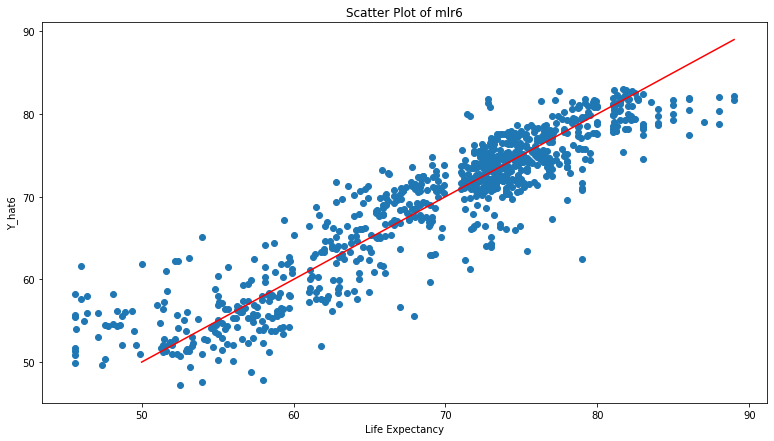

In [64]:
y = life_test['Life_Expectancy']
y_hat6 = result_mlr6.predict(life_test[['HIV_AIDS' , 'Status','Income_Composition_Of_Resources','Adult_Mortality',
                                        'Diphtheria','Infant_Deaths','GDP']])

# 시각화
plt.figure(figsize=(13,7))

plt.scatter(y, y_hat6, marker='o')
x = np.arange(50, 90)
plt.plot(x,x, 'red')
plt.xlabel('Life Expectancy')
plt.ylabel('Y_hat6')
plt.title('Scatter Plot of mlr6')

#### mlr7 : Thinness_5_9_years 변수 추가

In [65]:
result_mlr7 = smf.ols('Life_Expectancy ~ HIV_AIDS + Status + Income_Composition_Of_Resources + Adult_Mortality + Diphtheria + Infant_Deaths + GDP + Thinness_5_9_years + Status:Adult_Mortality', data=life_train).fit()
result_mlr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     1284.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:33:43   Log-Likelihood:                -5611.9
No. Observations:                2056   AIC:                         1.124e+04
Df Residuals:                    2046   BIC:                         1.130e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          62.8184      0.908     69.218      0.000      61.039      64.598
HIV_AIDS                           -5.3630      0.171    -31.421      0.000      -5.698      -5.028
Status                             -3.3724      0.503     -6.708      0.000      -4.358      -2.386
Income_Composition_Of_Resources    16.4590      0.786     20.942      0.000      14.918      18.000
Adult_Mortality                    -0.0306      0.004     -6.965      0.000      -0.039      -0.022
Diphtheria                          0.0618      0.007      9.469      0.000       0.049       0.075
Infant_Deaths                      -0.0357      0.004     -9.620      0.000      -0.043      -0.028
GDP                              8.446e-05   1.99e-05      4.240      0.000    4.54e-05       0.000
Thinness_5_9_years                 -0.1487      0.025     -5.919      0.000      -0.198      -0.099
Status:Adult_Mortality              0.0153      0.004      3.411      0.001       0.007       0.024
==============================================================================
Omnibus:                       54.820   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.113
Skew:                           0.001   Prob(JB):                     5.58e-29
Kurtosis:                       4.232   Cond. No.                     8.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**interaction effect 추가 (Status:Thinness_5_9_years)**

In [66]:
result_mlr71 = smf.ols('Life_Expectancy ~ HIV_AIDS + Status + Income_Composition_Of_Resources + Adult_Mortality + Diphtheria + Infant_Deaths + GDP + Thinness_5_9_years + Status:Adult_Mortality + Status:Thinness_5_9_years', data=life_train).fit()
result_mlr71.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     1185.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:36:24   Log-Likelihood:                -5589.3
No. Observations:                2056   AIC:                         1.120e+04
Df Residuals:                    2045   BIC:                         1.126e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          63.9840      0.914     69.975      0.000      62.191      65.777
HIV_AIDS                           -5.3795      0.169    -31.854      0.000      -5.711      -5.048
Status                             -4.6495      0.532     -8.735      0.000      -5.693      -3.606
Income_Composition_Of_Resources    16.3002      0.778     20.954      0.000      14.775      17.826
Adult_Mortality                    -0.0185      0.005     -3.935      0.000      -0.028      -0.009
Diphtheria                          0.0644      0.006      9.947      0.000       0.052       0.077
Infant_Deaths                      -0.0366      0.004     -9.958      0.000      -0.044      -0.029
GDP                              7.333e-05   1.98e-05      3.707      0.000    3.45e-05       0.000
Thinness_5_9_years                 -1.9577      0.270     -7.259      0.000      -2.487      -1.429
Status:Adult_Mortality              0.0032      0.005      0.659      0.510      -0.006       0.013
Status:Thinness_5_9_years           1.8225      0.271      6.736      0.000       1.292       2.353
==============================================================================
Omnibus:                       59.877   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.603
Skew:                           0.024   Prob(JB):                     5.39e-33
Kurtosis:                       4.316   Cond. No.                     9.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

=> Status : Adult_Mortality 항의 계수가 유의하지 않음

**기존에 존재하던 interaction effect 제거 (Status:Adult_Mortality)**

In [67]:
result_mlr72 = smf.ols('Life_Expectancy ~ HIV_AIDS + Status + Income_Composition_Of_Resources + Adult_Mortality + Diphtheria + Infant_Deaths + GDP + Thinness_5_9_years + Status:Thinness_5_9_years', data=life_train).fit()
result_mlr72.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     1317.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:36:35   Log-Likelihood:                -5589.6
No. Observations:                2056   AIC:                         1.120e+04
Df Residuals:                    2046   BIC:                         1.126e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          63.7896      0.865     73.710      0.000      62.092      65.487
HIV_AIDS                           -5.3692      0.168    -31.935      0.000      -5.699      -5.039
Status                             -4.4382      0.425    -10.446      0.000      -5.271      -3.605
Income_Composition_Of_Resources    16.2998      0.778     20.956      0.000      14.774      17.825
Adult_Mortality                    -0.0155      0.001    -15.971      0.000      -0.017      -0.014
Diphtheria                          0.0643      0.006      9.944      0.000       0.052       0.077
Infant_Deaths                      -0.0365      0.004     -9.945      0.000      -0.044      -0.029
GDP                              7.349e-05   1.98e-05      3.716      0.000    3.47e-05       0.000
Thinness_5_9_years                 -2.0246      0.250     -8.105      0.000      -2.514      -1.535
Status:Thinness_5_9_years           1.8896      0.251      7.540      0.000       1.398       2.381
==============================================================================
Omnibus:                       60.006   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.108
Skew:                           0.024   Prob(JB):                     4.18e-33
Kurtosis:                       4.318   Cond. No.                     8.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**더 좋은 모델을 선택하기 위한 F test**

In [68]:
anova_lm(result_mlr72, result_mlr71, typ=1)

C:\Users\bbori\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\bbori\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\bbori\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2046.0,27665.849806,0.0,NaN,NaN,NaN
1,2045.0,27659.973687,1.0,5.876119,0.434442,0.509891


=> 유의확률이 0.05보다 크기 때문에 하나의 interaction term만 (Staus:Thinness) 존재하는 모형이 효과적이다.

**공선성 경고를 확인하기 위해 VIF 지수 확인**

In [70]:
y, X = dmatrices('Life_Expectancy ~ HIV_AIDS + Status + Income_Composition_Of_Resources + Adult_Mortality + Diphtheria + Infant_Deaths + GDP + Thinness_5_9_years', life_train, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,99.590661,Intercept
1,1.961866,HIV_AIDS
2,1.495045,Status
3,2.693772,Income_Composition_Of_Resources
4,1.661627,Adult_Mortality
5,1.485516,Diphtheria
6,1.349325,Infant_Deaths
7,1.637978,GDP
8,1.474241,Thinness_5_9_years


=> 심각한 공선성 문제를 유발하는 변수 없음

#### mlr72_Scatter Plot

Text(0.5, 1.0, 'Scatter Plot of mlr72')

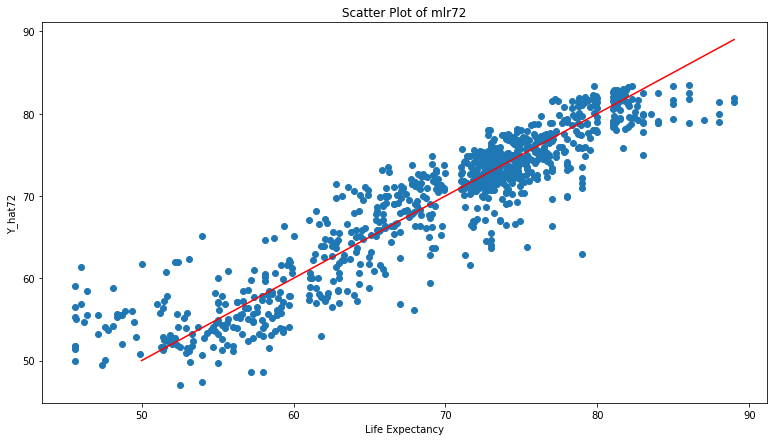

In [72]:
y = life_test['Life_Expectancy']
y_hat72 = result_mlr72.predict(life_test[['HIV_AIDS' , 'Status','Income_Composition_Of_Resources','Adult_Mortality',
                                        'Diphtheria','Infant_Deaths','GDP','Thinness_5_9_years']])

# 시각화
plt.figure(figsize=(13,7))

plt.scatter(y, y_hat72, marker='o')
x = np.arange(50, 90)
plt.plot(x,x, 'red')
plt.xlabel('Life Expectancy')
plt.ylabel('Y_hat72')
plt.title('Scatter Plot of mlr72')

#### mlr8 : Measles 변수 추가

In [73]:
result_mlr8 = smf.ols('Life_Expectancy ~ HIV_AIDS + Status + Income_Composition_Of_Resources + Adult_Mortality + Diphtheria + Infant_Deaths + GDP + Thinness_5_9_years + Measles + Status:Thinness_5_9_years', data=life_train).fit()
result_mlr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     1191.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:37:08   Log-Likelihood:                -5585.1
No. Observations:                2056   AIC:                         1.119e+04
Df Residuals:                    2045   BIC:                         1.125e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          64.1410      0.872     73.574      0.000      62.431      65.851
HIV_AIDS                           -5.3936      0.168    -32.103      0.000      -5.723      -5.064
Status                             -4.5632      0.426    -10.709      0.000      -5.399      -3.728
Income_Composition_Of_Resources    16.3136      0.776     21.014      0.000      14.791      17.836
Adult_Mortality                    -0.0153      0.001    -15.884      0.000      -0.017      -0.013
Diphtheria                          0.0618      0.007      9.486      0.000       0.049       0.075
Infant_Deaths                      -0.0308      0.004     -7.415      0.000      -0.039      -0.023
GDP                              7.321e-05   1.97e-05      3.710      0.000    3.45e-05       0.000
Thinness_5_9_years                 -2.0732      0.250     -8.298      0.000      -2.563      -1.583
Measles                            -0.0009      0.000     -2.977      0.003      -0.002      -0.000
Status:Thinness_5_9_years           1.9530      0.251      7.779      0.000       1.461       2.445
==============================================================================
Omnibus:                       58.054   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.827
Skew:                           0.037   Prob(JB):                     2.63e-31
Kurtosis:                       4.280   Cond. No.                     8.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**interaction effect 추가 (Status:Measles)**

In [74]:
result_mlr81 = smf.ols('Life_Expectancy ~ HIV_AIDS + Status + Income_Composition_Of_Resources + Adult_Mortality + Diphtheria + Infant_Deaths + GDP + Thinness_5_9_years + Measles + Status:Thinness_5_9_years + Status:Measles', data=life_train).fit()
result_mlr81.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1091.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:37:13   Log-Likelihood:                -5578.0
No. Observations:                2056   AIC:                         1.118e+04
Df Residuals:                    2044   BIC:                         1.125e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          63.6379      0.879     72.389      0.000      61.914      65.362
HIV_AIDS                           -5.4020      0.167    -32.255      0.000      -5.730      -5.074
Status                             -3.9478      0.455     -8.679      0.000      -4.840      -3.056
Income_Composition_Of_Resources    16.3900      0.774     21.173      0.000      14.872      17.908
Adult_Mortality                    -0.0154      0.001    -15.943      0.000      -0.017      -0.013
Diphtheria                          0.0602      0.007      9.246      0.000       0.047       0.073
Infant_Deaths                      -0.0275      0.004     -6.506      0.000      -0.036      -0.019
GDP                              7.073e-05   1.97e-05      3.593      0.000    3.21e-05       0.000
Thinness_5_9_years                 -1.8869      0.254     -7.433      0.000      -2.385      -1.389
Measles                             0.0021      0.001      2.454      0.014       0.000       0.004
Status:Thinness_5_9_years           1.7738      0.255      6.965      0.000       1.274       2.273
Status:Measles                     -0.0035      0.001     -3.779      0.000      -0.005      -0.002
==============================================================================
Omnibus:                       59.214   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.193
Skew:                           0.038   Prob(JB):                     2.96e-32
Kurtosis:                       4.300   Cond. No.                     8.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**더 좋은 모델을 선택하기 위한 F test**

In [75]:
anova_lm(result_mlr8, result_mlr81, typ=1)

C:\Users\bbori\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\bbori\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\bbori\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2045.0,27546.452443,0.0,NaN,NaN,NaN
1,2044.0,27355.349195,1.0,191.103247,14.279293,0.000162


=> 유의확률이 0.05보다 작기 때문에 interaction term이 추가된 모형이 효과적이다.

**공선성 경고를 확인하기 위해 VIF 지수 확인**

In [76]:
y, X = dmatrices('Life_Expectancy ~ HIV_AIDS + Status + Income_Composition_Of_Resources + Adult_Mortality + Diphtheria + Infant_Deaths + GDP + Thinness_5_9_years + Measles', life_train, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,100.872262,Intercept
1,1.965682,HIV_AIDS
2,1.499040,Status
3,2.693976,Income_Composition_Of_Resources
4,1.663135,Adult_Mortality
5,1.513736,Diphtheria
6,1.731430,Infant_Deaths
7,1.637998,GDP
8,1.529133,Thinness_5_9_years
9,1.624610,Measles


=> 심각한 공선성 문제를 유발하는 변수 없음

#### mlr81_Scatter Plot

Text(0.5, 1.0, 'Scatter Plot of mlr81')

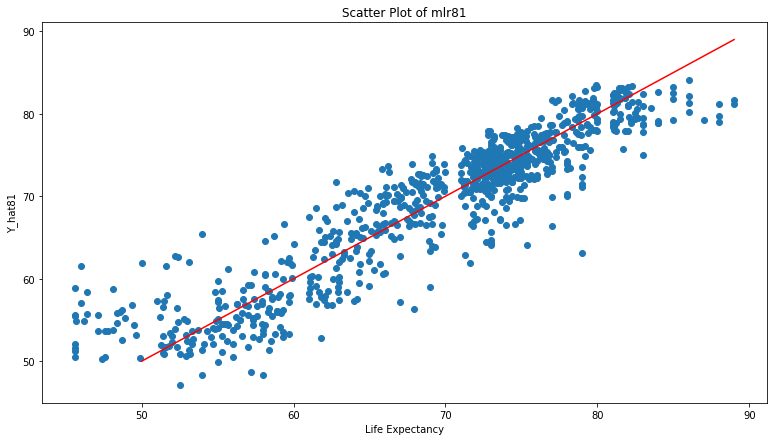

In [77]:
y = life_test['Life_Expectancy']
y_hat81 = result_mlr81.predict(life_test[['HIV_AIDS' , 'Status','Income_Composition_Of_Resources','Adult_Mortality',
                                        'Diphtheria','Infant_Deaths','GDP','Thinness_5_9_years','Measles']])

# 시각화
plt.figure(figsize=(13,7))

plt.scatter(y, y_hat81, marker='o')
x = np.arange(50, 90)
plt.plot(x,x, 'red')
plt.xlabel('Life Expectancy')
plt.ylabel('Y_hat81')
plt.title('Scatter Plot of mlr81')

### 최종 회귀 모형

In [78]:
result = smf.ols('Life_Expectancy ~ HIV_AIDS + Status + Income_Composition_Of_Resources + Adult_Mortality + Diphtheria + Infant_Deaths + GDP + Thinness_5_9_years + Measles + Status:Thinness_5_9_years + Status:Measles', data=life_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1091.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:38:43   Log-Likelihood:                -5578.0
No. Observations:                2056   AIC:                         1.118e+04
Df Residuals:                    2044   BIC:                         1.125e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          63.6379      0.879     72.389      0.000      61.914      65.362
HIV_AIDS                           -5.4020      0.167    -32.255      0.000      -5.730      -5.074
Status                             -3.9478      0.455     -8.679      0.000      -4.840      -3.056
Income_Composition_Of_Resources    16.3900      0.774     21.173      0.000      14.872      17.908
Adult_Mortality                    -0.0154      0.001    -15.943      0.000      -0.017      -0.013
Diphtheria                          0.0602      0.007      9.246      0.000       0.047       0.073
Infant_Deaths                      -0.0275      0.004     -6.506      0.000      -0.036      -0.019
GDP                              7.073e-05   1.97e-05      3.593      0.000    3.21e-05       0.000
Thinness_5_9_years                 -1.8869      0.254     -7.433      0.000      -2.385      -1.389
Measles                             0.0021      0.001      2.454      0.014       0.000       0.004
Status:Thinness_5_9_years           1.7738      0.255      6.965      0.000       1.274       2.273
Status:Measles                     -0.0035      0.001     -3.779      0.000      -0.005      -0.002
==============================================================================
Omnibus:                       59.214   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.193
Skew:                           0.038   Prob(JB):                     2.96e-32
Kurtosis:                       4.300   Cond. No.                     8.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Life_Expectancy =  61.7 - 5.3 x HIV_AIDS -1.9 x Status + 16.5 x Income_Composition_Of_Resources -0.016 x Adult_Mortality + 0.06 x Diphtheria - 0.03 x Infant_Deaths + 0.0001 x GDP - 0.14 x Thinness_5_9_years - 0.001 x Measles

#### 최종 모델 가정 확인

In [24]:
final_var = ['Life_Expectancy', 'HIV_AIDS', 'Status', 'Income_Composition_Of_Resources',
            'Adult_Mortality', 'Diphtheria', 'Infant_Deaths', 'GDP',
           'Thinness_5_9_years', 'Measles']

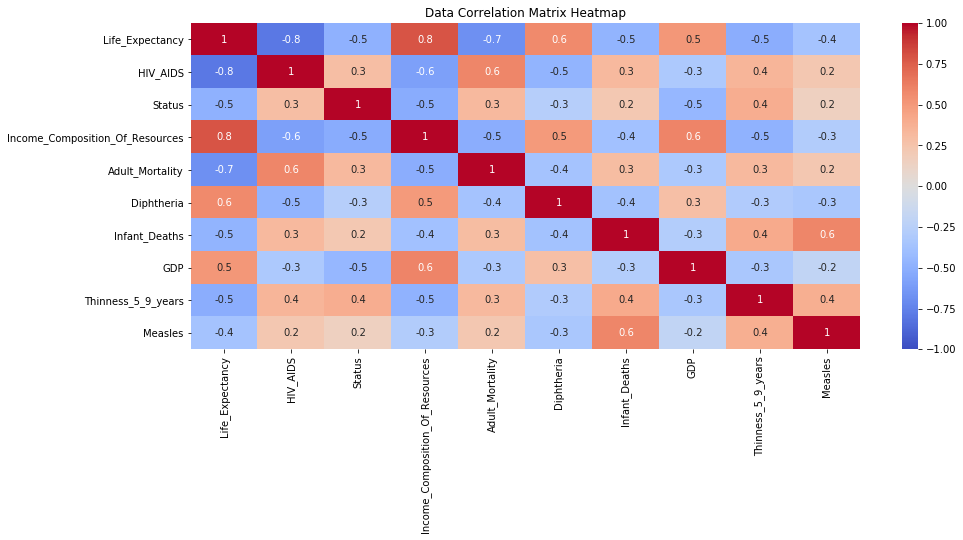

In [80]:
# 선형성
plt.figure(figsize=(15,6))
sns.heatmap(life_train[final_var].corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.title('Data Correlation Matrix Heatmap')
plt.show()

In [81]:
# 다중공선성
y, X = dmatrices('Life_Expectancy ~ HIV_AIDS + Status + Income_Composition_Of_Resources + Adult_Mortality + Diphtheria + Infant_Deaths + GDP + Thinness_5_9_years + Measles', life_train, return_type = 'dataframe')

vif = pd.DataFrame()
vif["features"] = X.columns 
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,features,VIF Factor
0,Intercept,100.872262
1,HIV_AIDS,1.965682
2,Status,1.499040
3,Income_Composition_Of_Resources,2.693976
4,Adult_Mortality,1.663135
5,Diphtheria,1.513736
6,Infant_Deaths,1.731430
7,GDP,1.637998
8,Thinness_5_9_years,1.529133
9,Measles,1.624610


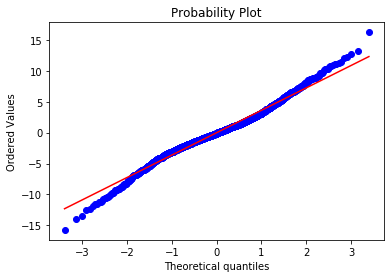

In [82]:
# 정규성
resid = result.resid

stats.probplot(resid,plot=plt)
plt.show()

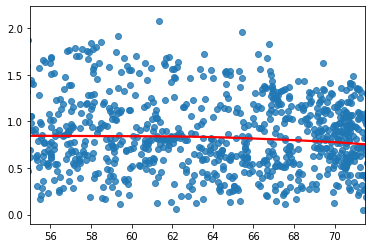

In [83]:
# 등분산성
fitted = result.predict(life_train)
sns.regplot(fitted, np.sqrt(np.abs(stats.zscore(resid))),lowess = True, line_kws={'color' : 'red'})
plt.xlim(55.0, 71.50)
plt.show()

#### 회귀 모형 예측력

Text(0.5, 1.0, 'Scatter Plot of Life_expectancy')

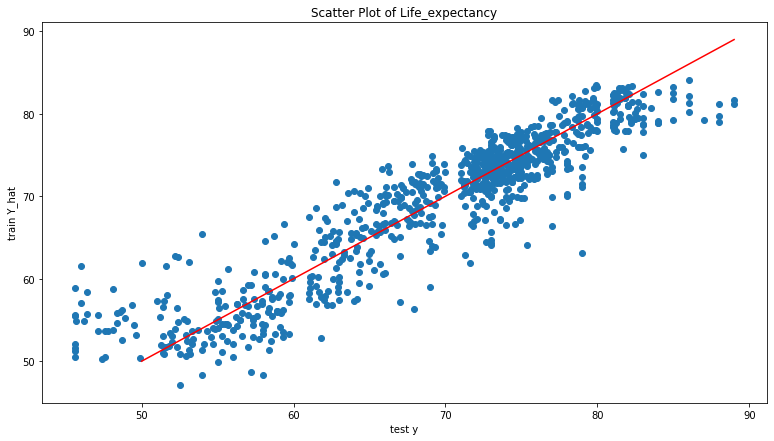

In [87]:
y = life_test['Life_Expectancy']
y_hat = result.predict(life_test[['HIV_AIDS' , 'Status','Income_Composition_Of_Resources','Adult_Mortality',
                                        'Diphtheria','Infant_Deaths','GDP','Thinness_5_9_years','Measles']])

# 시각화
plt.figure(figsize=(13,7))

plt.scatter(y, y_hat, marker='o')
x = np.arange(50, 90)
plt.plot(x,x, 'red')
plt.xlabel('test y')
plt.ylabel('train Y_hat')
plt.title('Scatter Plot of Life_expectancy')

In [84]:
X_test = life_test.copy()

In [85]:
del X_test['Life_Expectancy']

In [86]:
mse = mean_squared_error(y_true = life_test['Life_Expectancy'], y_pred = result.predict(X_test))
print('mse =', mse) 

rmse= np.sqrt(mse)
print("rmse =",rmse)

y_true = life_test["Life_Expectancy"]
y_pred = result.predict(X_test)

def MAE(y_true, y_pred): 
    print ("mae =", np.mean(np.abs((y_true - y_pred))))

MAE(y_true, y_pred)

mse = 12.814474877327033
rmse = 3.5797311180208817
mae = 2.6641037176607725


In [2]:
119172 * 7.073e-05

8.429035559999999